<h1 style="text-align:center;color:teal;font-family:calibri;font-size:250%">Lead Scoring Case Study </h1>

### Import libraries

In [126]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [127]:
#import the visualisation libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_columns",None)

In [128]:
#import the ML libraries
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

### Step 1: Importing the Dataset

In [129]:
leads = pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step 2: Inspecting the Dataframe

In [130]:
leads.shape

(9240, 37)

In [131]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [132]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### Check the Percent of null values

In [133]:
leads.isnull().sum()*100/leads.shape[0]

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

### Step 3: Data Cleaning

In [134]:
#drop the Prospect ID  and Lead Number columns as it is a unique Identification value
leads.drop(columns = ["Prospect ID","Lead Number"],axis=1,inplace=True)

In [135]:
#list the categorical columns
cat_cols = ["Lead Origin","Lead Source","Country","Specialization","How did you hear about X Education","What is your current occupation","What matters most to you in choosing a course","Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Tags","Lead Quality","Lead Profile","City","Last Notable Activity"]
cat_cols

['Lead Origin',
 'Lead Source',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Tags',
 'Lead Quality',
 'Lead Profile',
 'City',
 'Last Notable Activity']

In [136]:
#Check the unique values in each category
for i in cat_cols:
    print(i+":")
    print(leads[i].value_counts())
    print("__________________________________________")

Lead Origin:
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
__________________________________________
Lead Source:
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64
__________________________________________
Country:
India                   6492
United States             69
United Arab Emirates      53
Singapore             

####  Check for missing/null values percentage

In [137]:
leads.isnull().sum()/leads.shape[0]*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

#### Impute "Select" values as null

In [138]:
sel = ["Specialization","How did you hear about X Education","Lead Profile","City"]

In [139]:
leads[sel] = leads[sel].replace("Select",np.nan)

In [140]:
#Check for missing vlaues
leads.isnull().sum()/leads.shape[0]*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

#### Missing values treatment

#### Dropping columns with null values greater than 40%

In [141]:
cols = leads.columns
for i in cols:
    if leads[i].isnull().sum()/leads.shape[0]*100 > 40:
        leads.drop(i,axis=1,inplace=True)

In [142]:
leads.isnull().sum()/leads.shape[0]*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

#### Imputing missing values with mode for null values less than 16%

In [143]:
cols = leads.columns
for i in cols:
    if leads[i].isnull().sum()/leads.shape[0]*100 < 16 and leads[i].dtype == "object":
        leads[i].replace(np.nan,leads[i].mode,inplace=True)

In [144]:
leads.isnull().sum()/leads.shape[0]*100

Lead Origin                                       0.000000
Lead Source                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     0.000000
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

#### Imputing missing values greater than 16% and less than 40% with "other" category

In [145]:
cols = leads.columns
for i in cols:
    if leads[i].isnull().sum()/leads.shape[0]*100 > 16 and leads[i].dtype == "object":
        leads[i].replace(np.nan,"Others",inplace=True)

In [146]:
leads.isnull().sum()/leads.shape[0]*100

Lead Origin                                      0.000000
Lead Source                                      0.000000
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    0.000000
Country                                          0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine                                         0.000000
Newspaper Article                                0.000000
X Education Forums                               0.000000
Newspaper     

In [147]:
leads.shape

(9240, 28)

In [148]:
#Validate the dtype of columns
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

#### Exclude the Rows with null values on Column TotalVisits and Page Views Per Visit

In [149]:
leads = leads[~pd.isnull(leads['TotalVisits'])]

In [150]:
leads = leads[~pd.isnull(leads['Page Views Per Visit'])]

In [151]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9103 non-null   object 
 1   Lead Source                                    9103 non-null   object 
 2   Do Not Email                                   9103 non-null   object 
 3   Do Not Call                                    9103 non-null   object 
 4   Converted                                      9103 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9103 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9103 non-null   object 
 9   Country                                        9103 

### Step 4: EDA on the dataset

In [152]:
cat = list(leads.select_dtypes(include='object'))
cat

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'City',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

Lead Origin


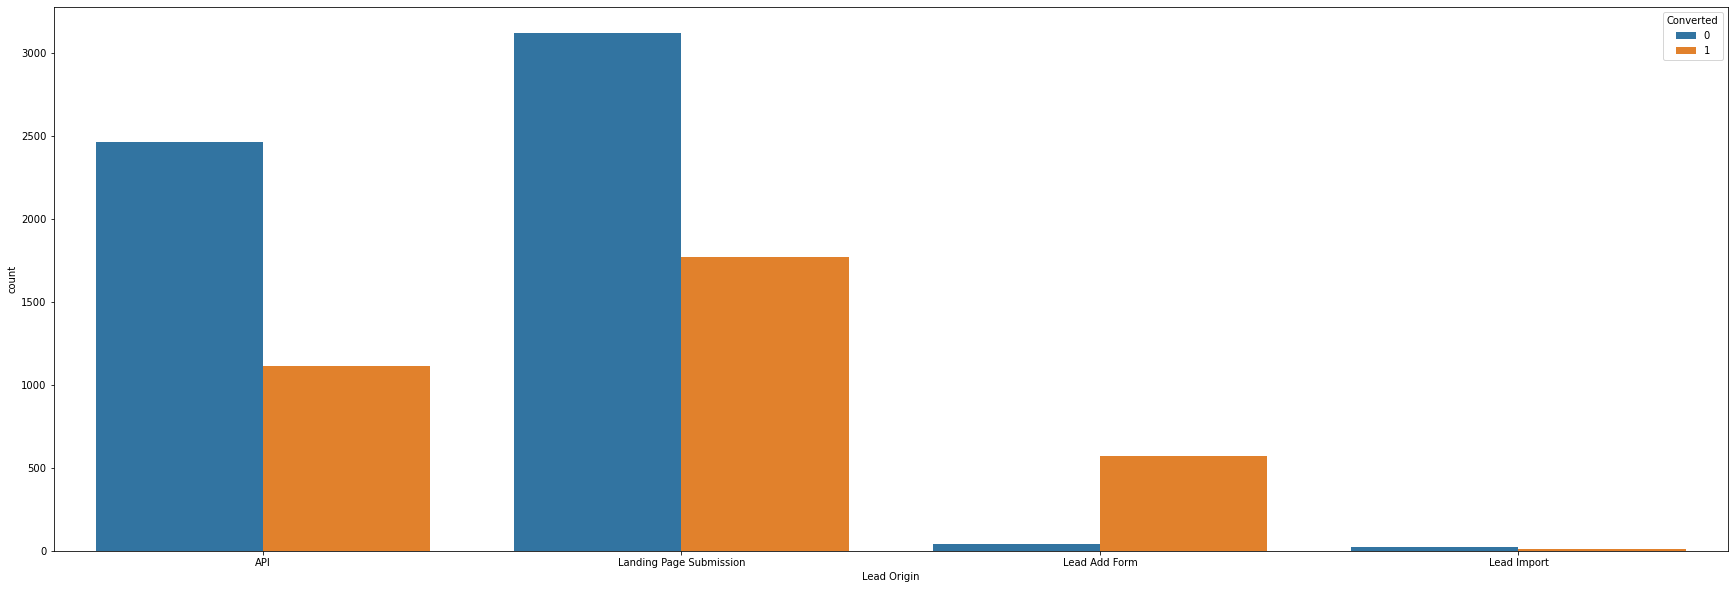

Lead Source


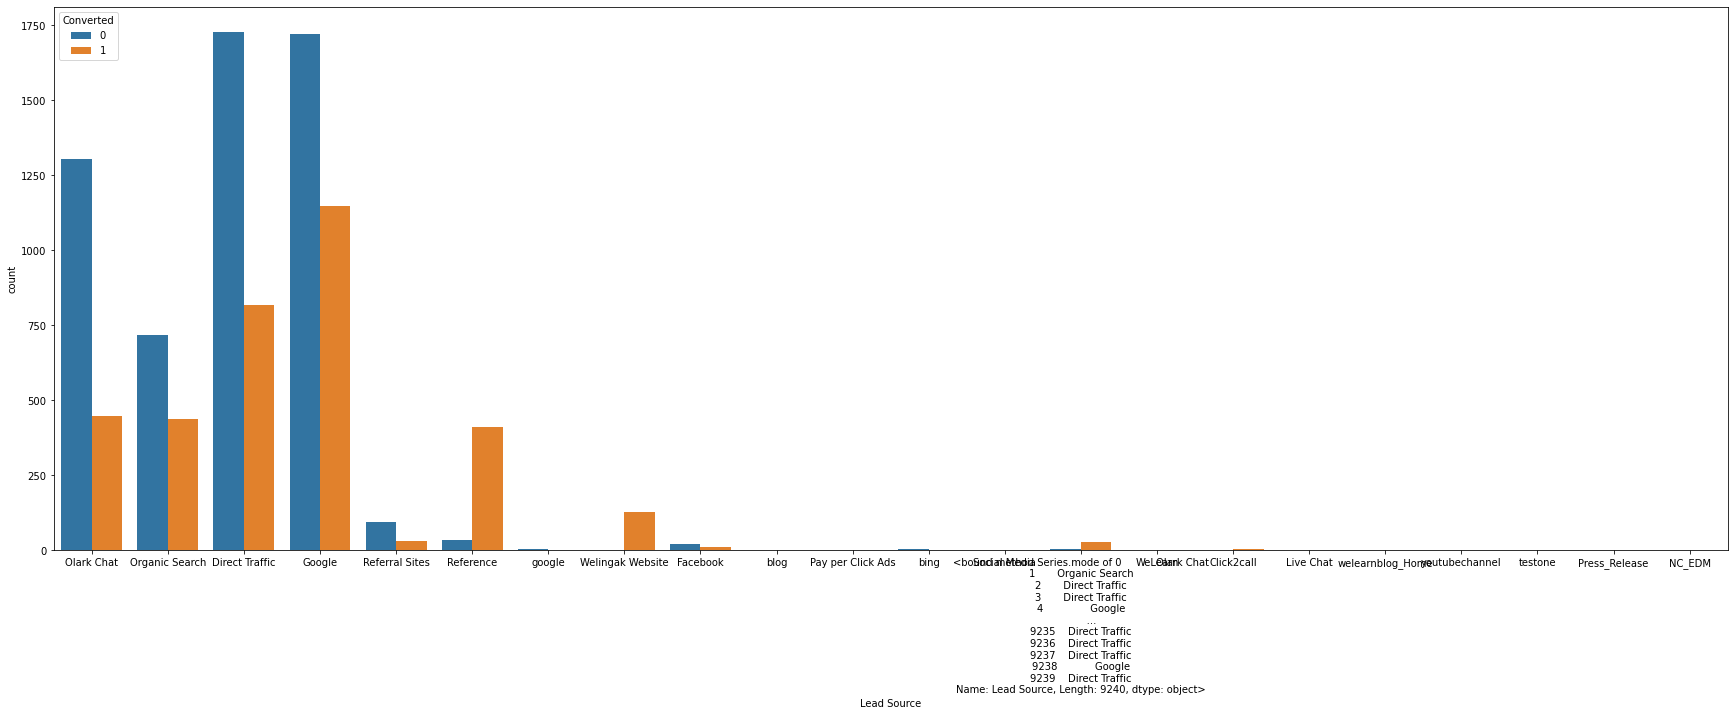

Do Not Email


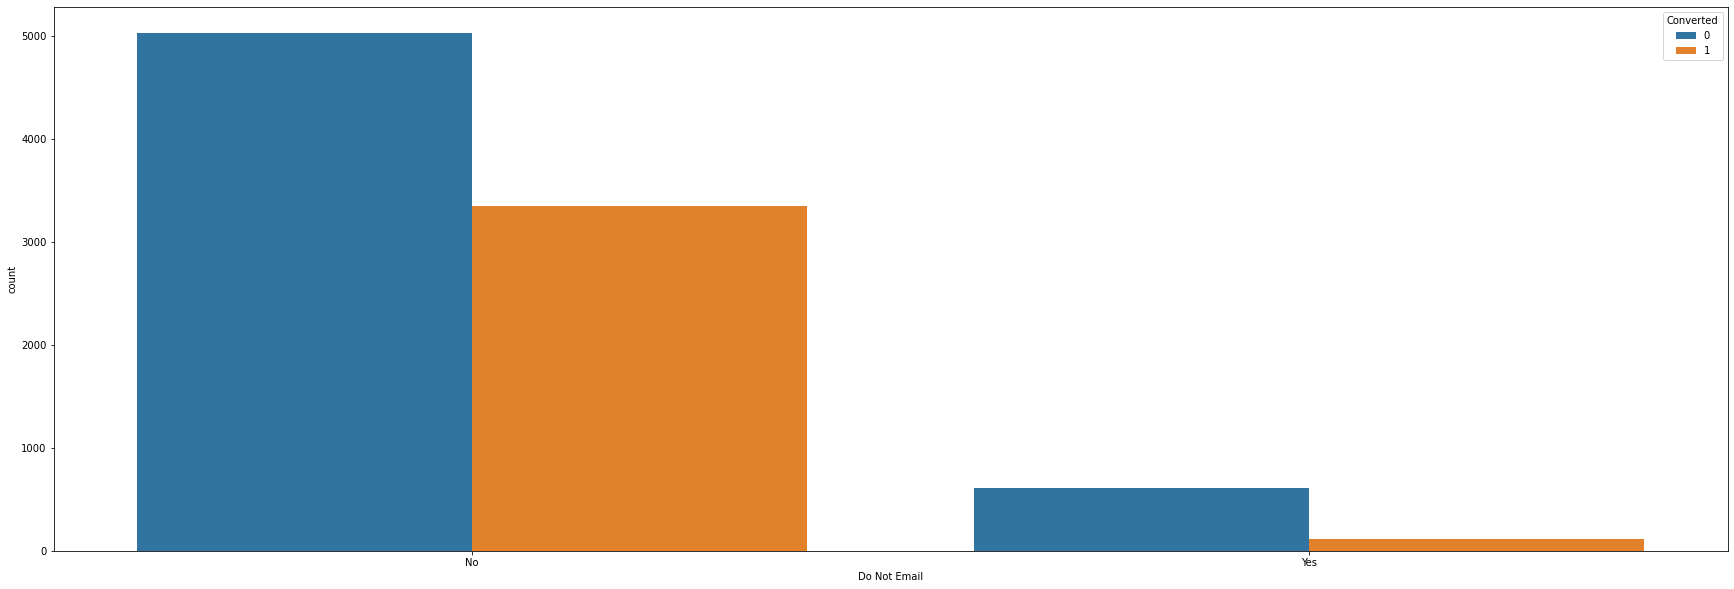

Do Not Call


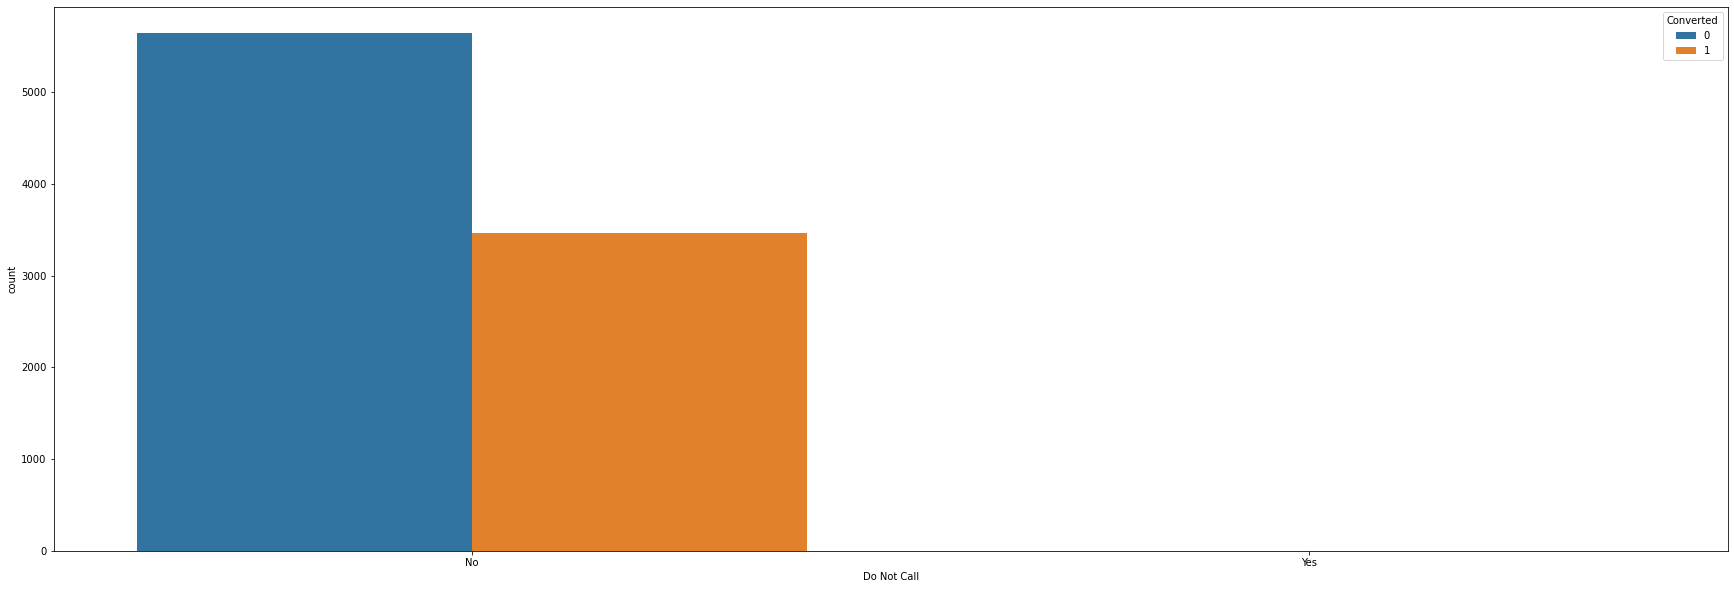

Last Activity


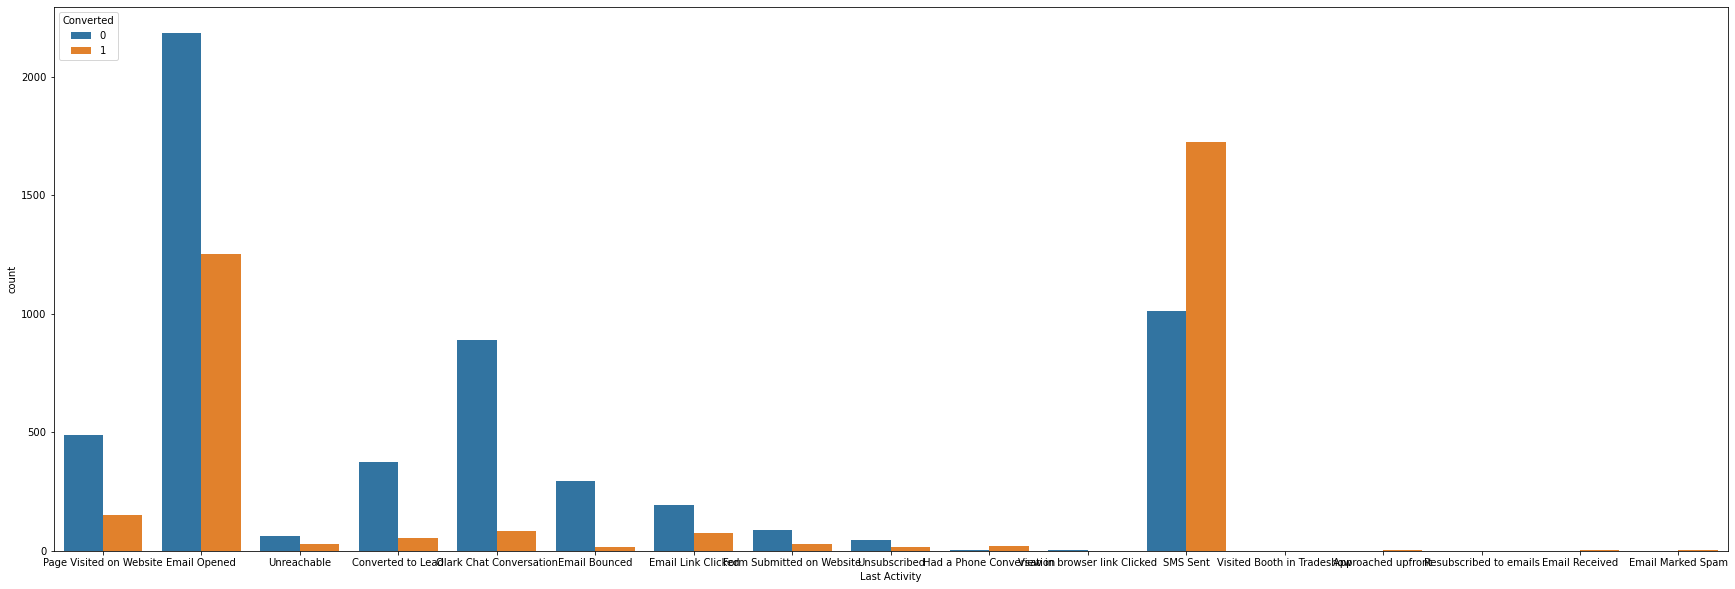

Country


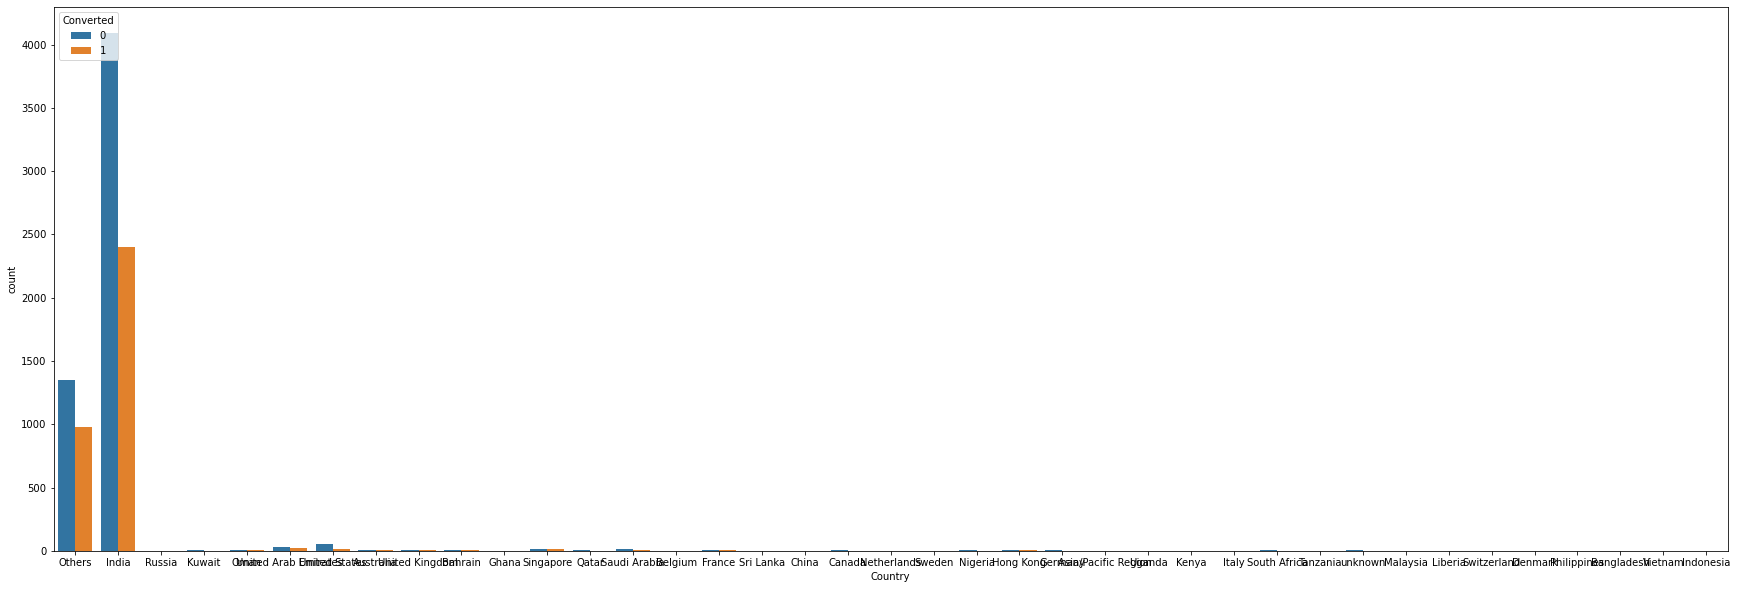

Specialization


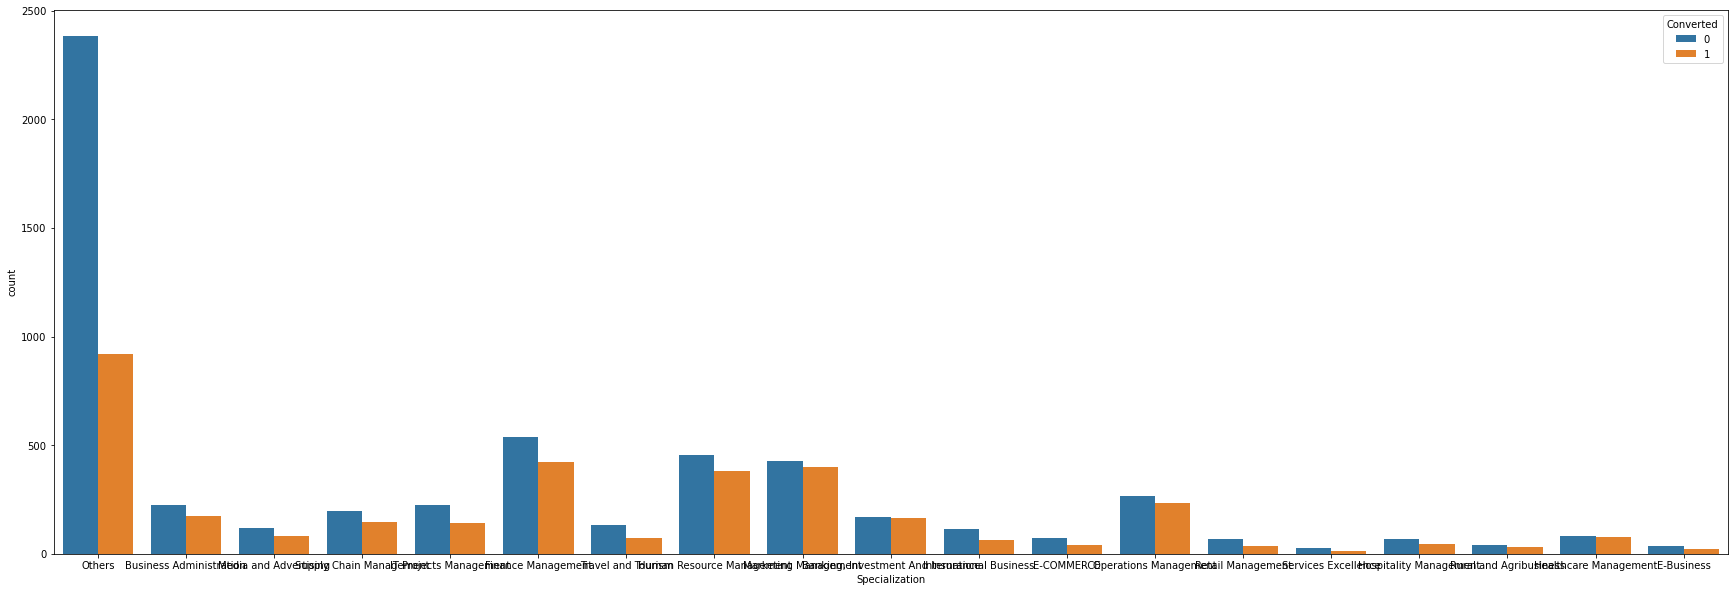

What is your current occupation


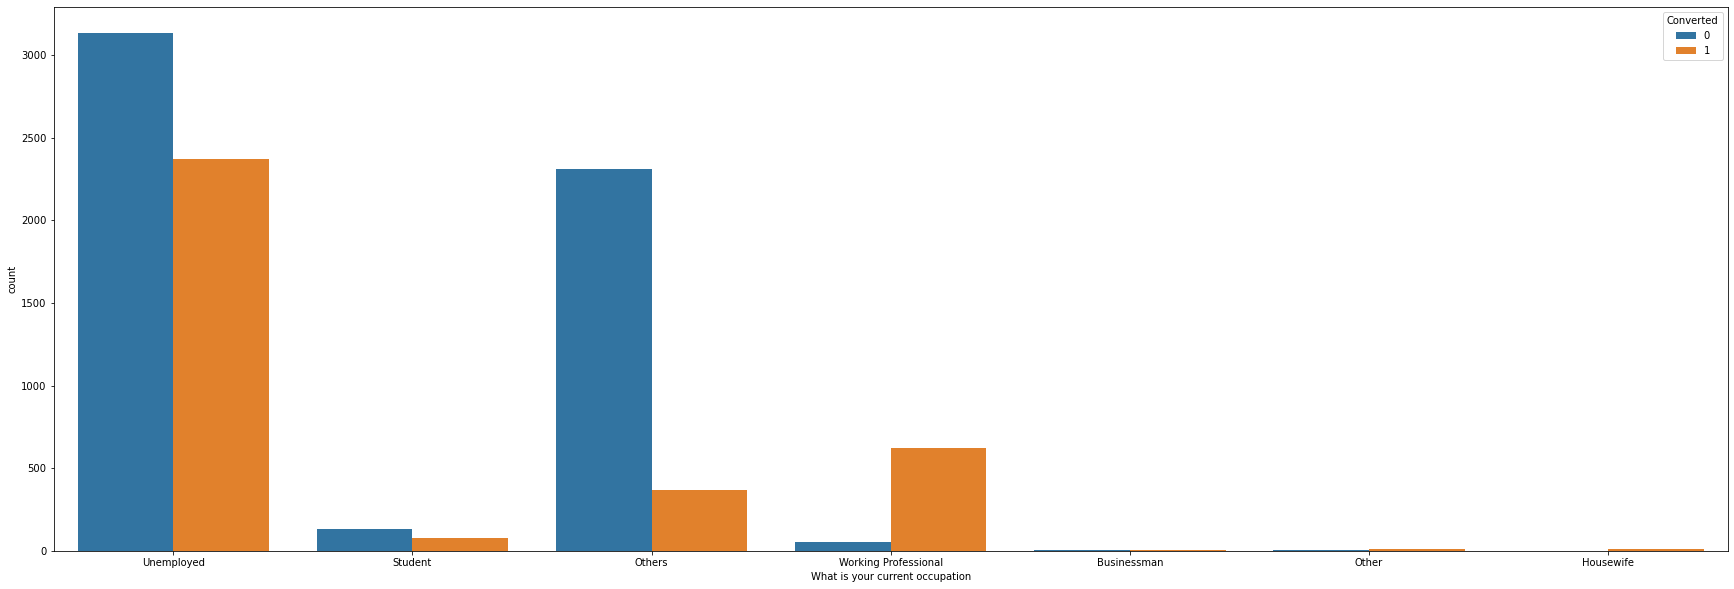

What matters most to you in choosing a course


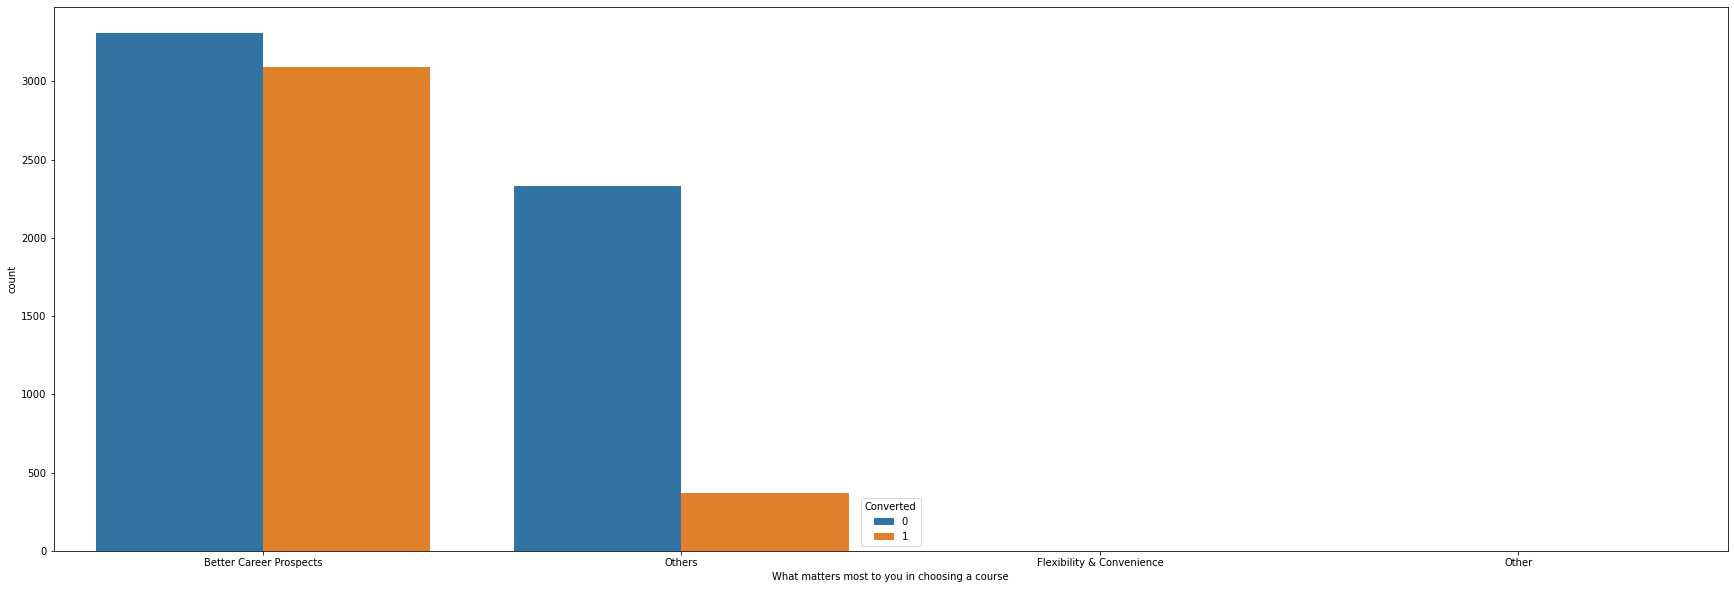

Search


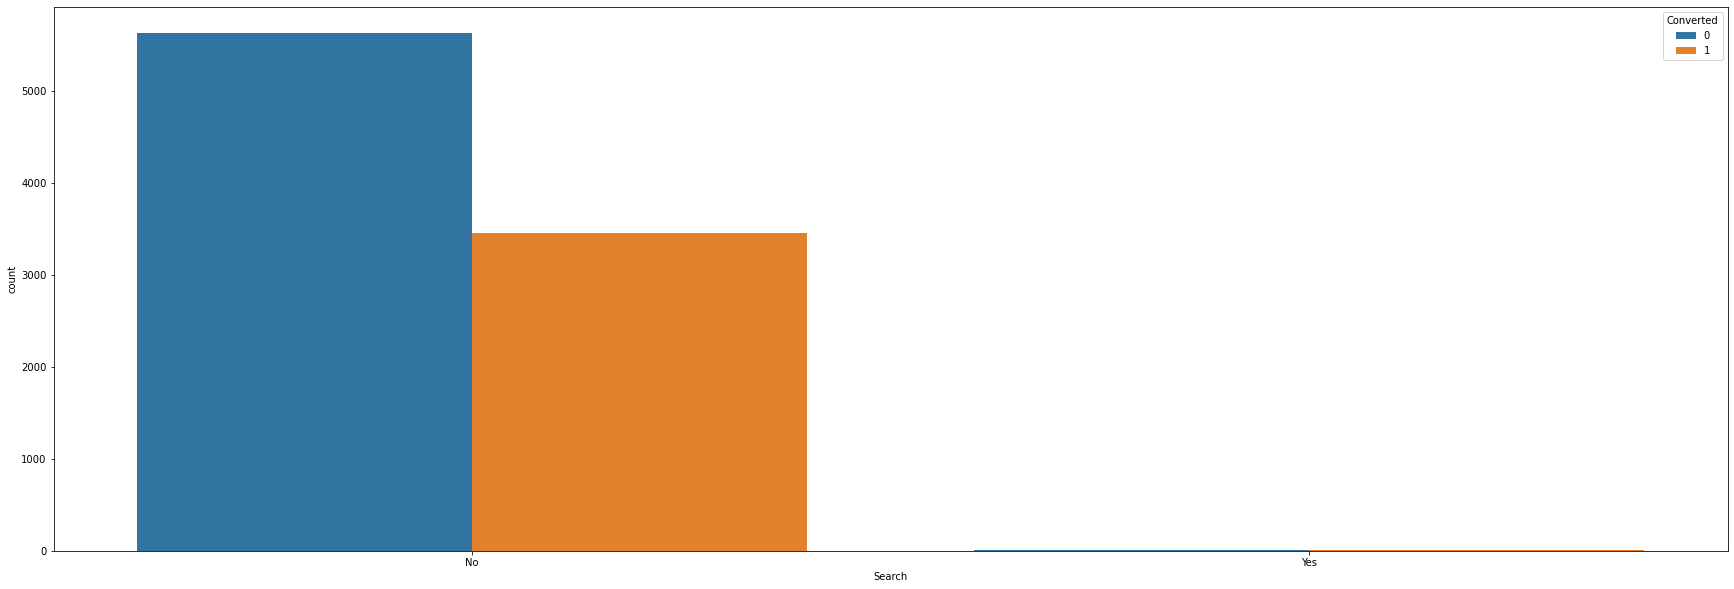

Magazine


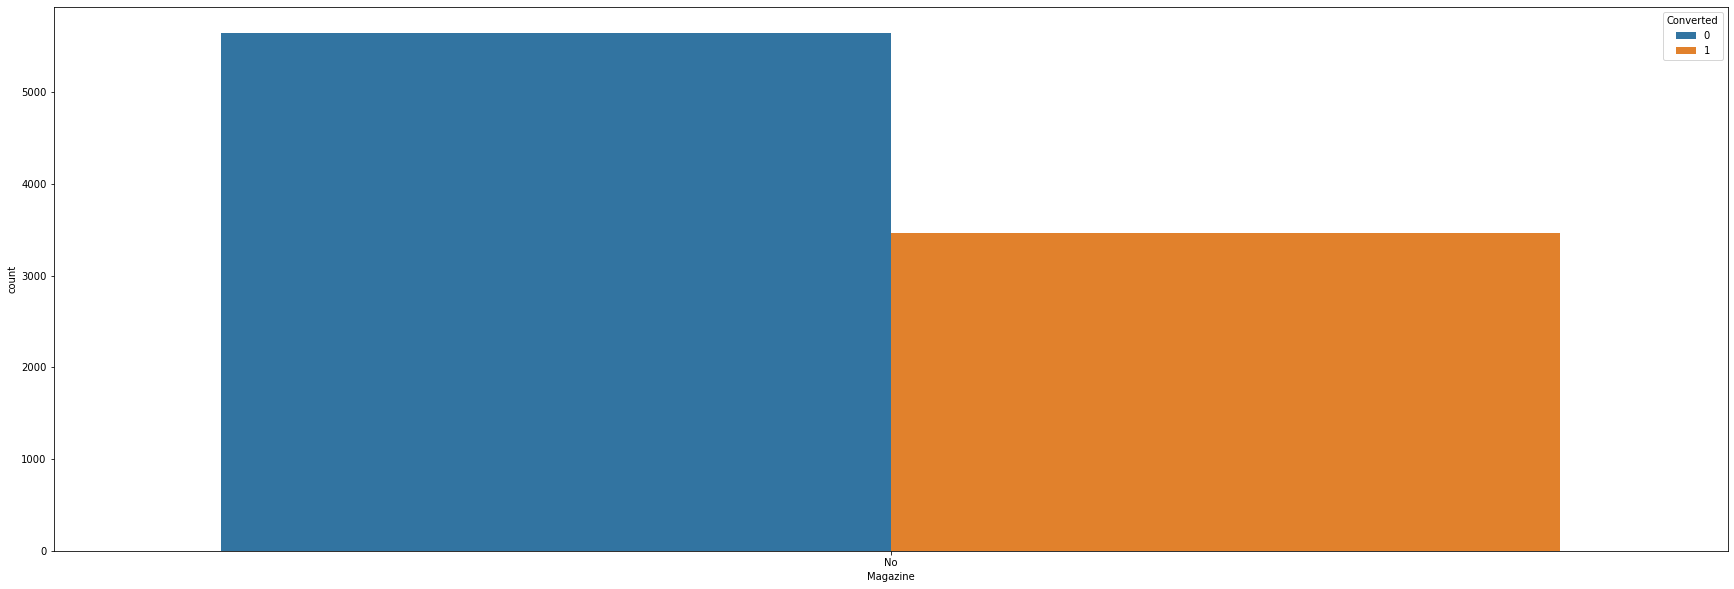

Newspaper Article


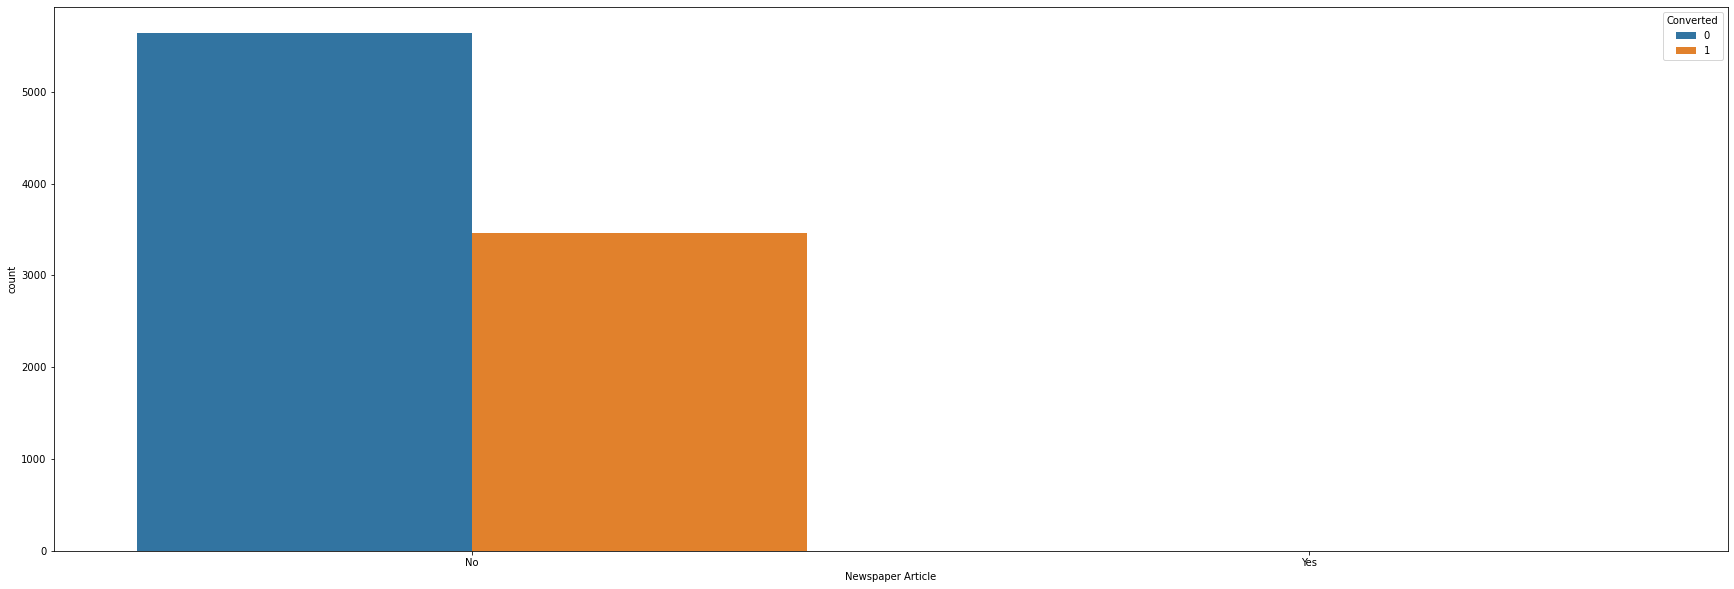

X Education Forums


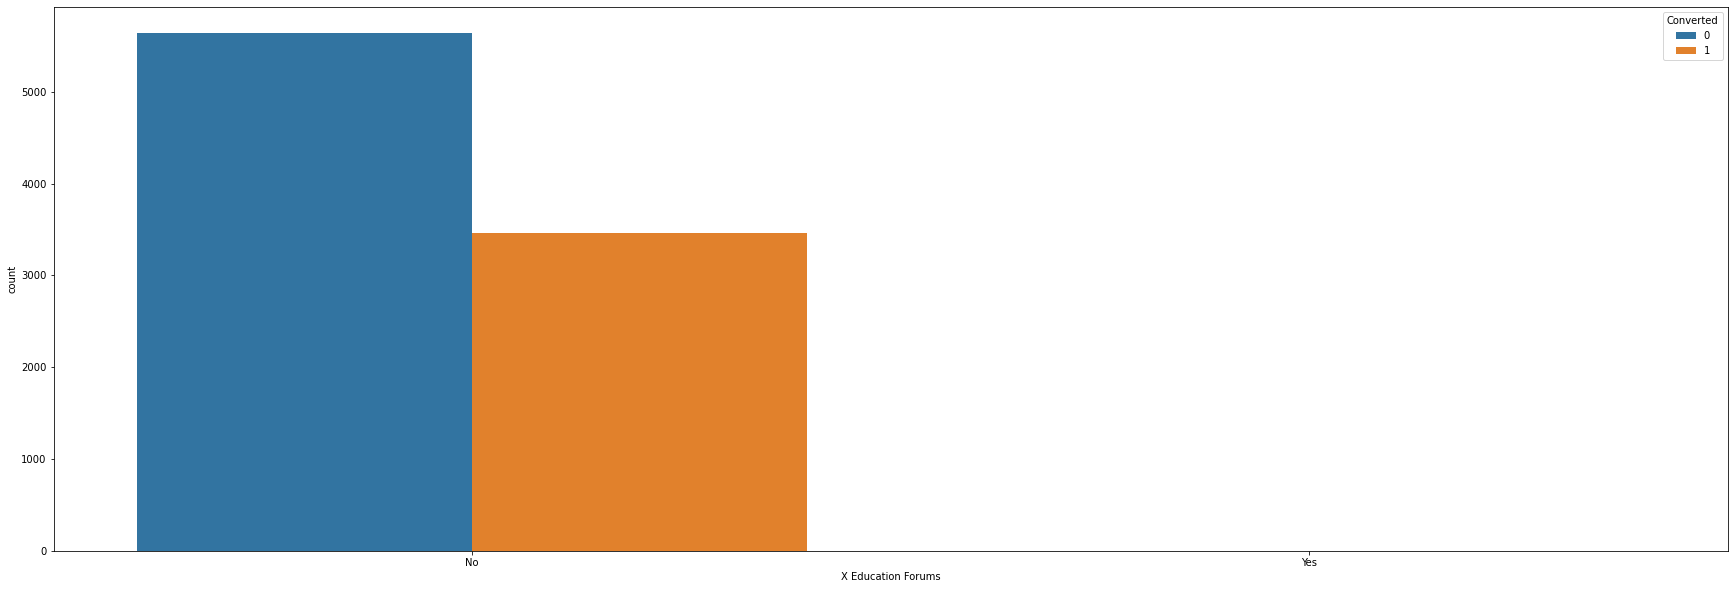

Newspaper


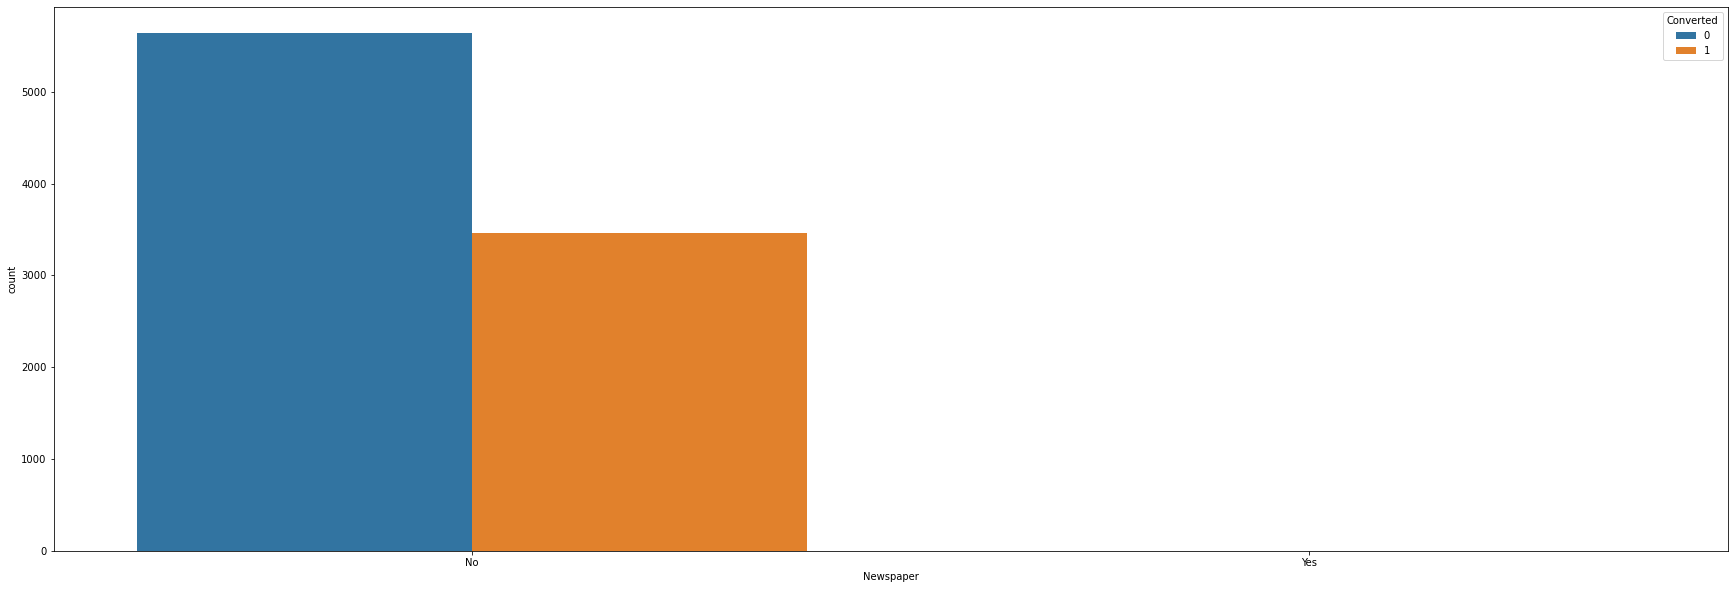

Digital Advertisement


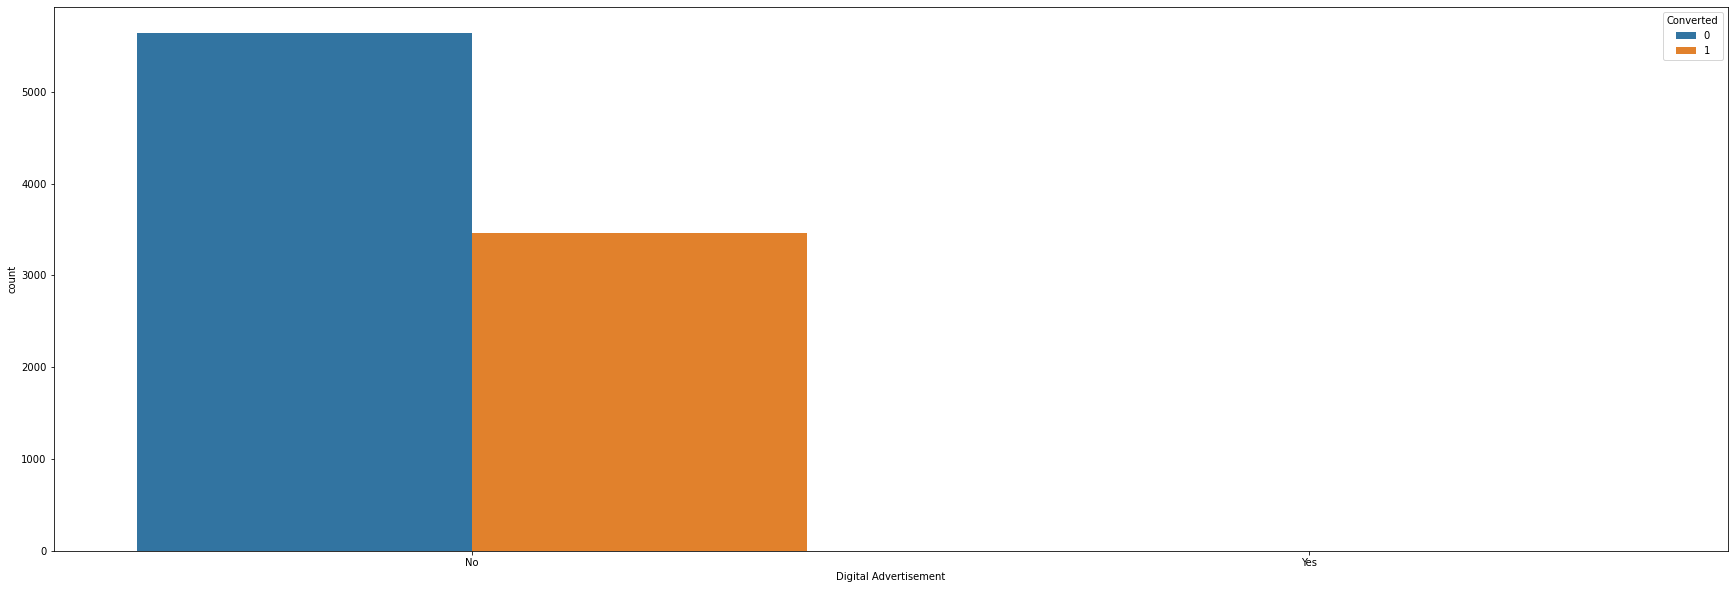

Through Recommendations


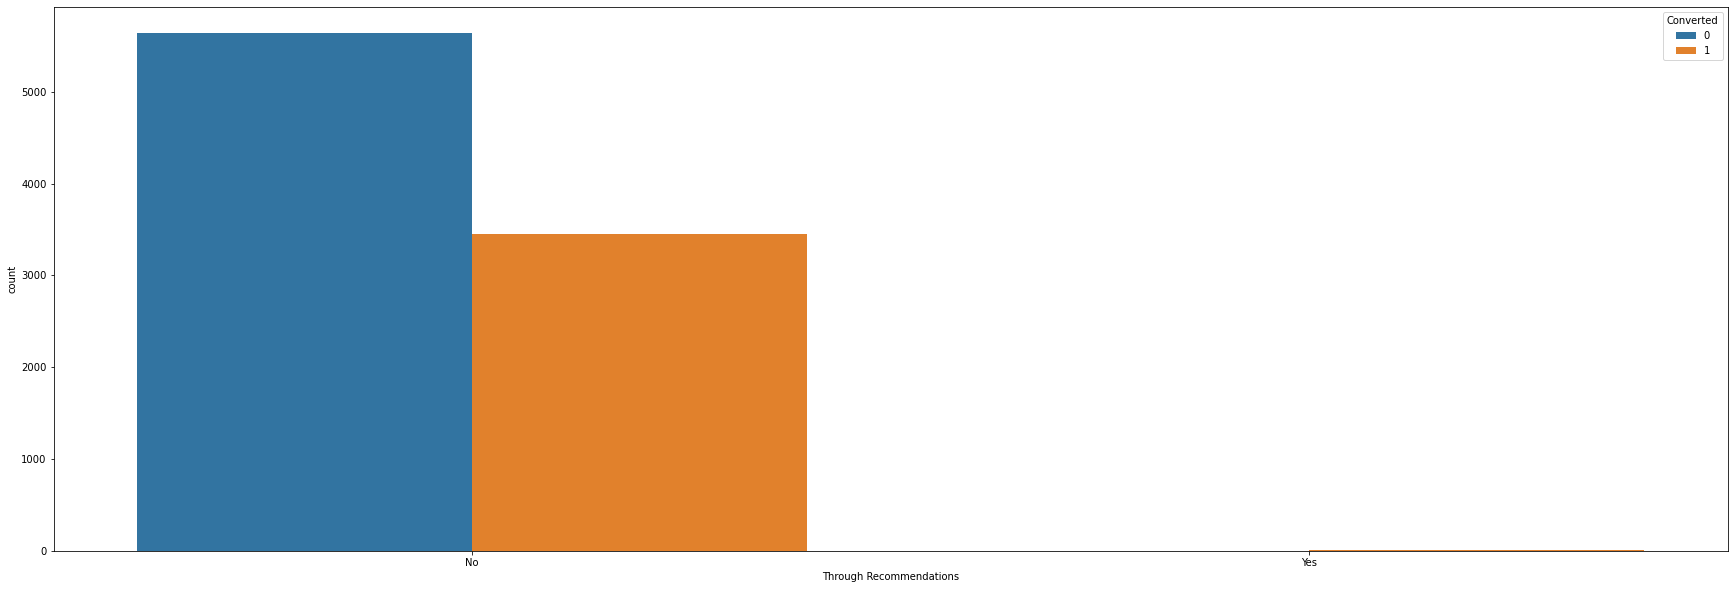

Receive More Updates About Our Courses


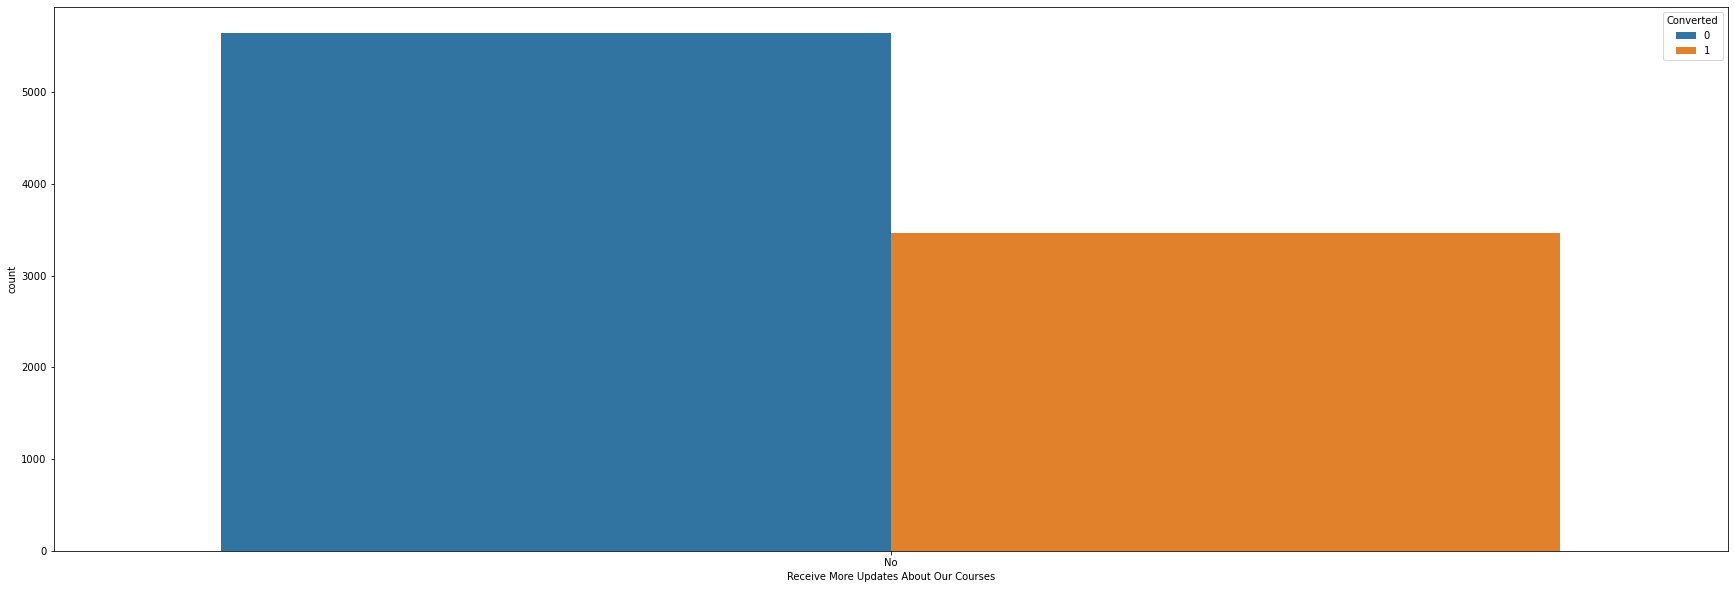

Tags


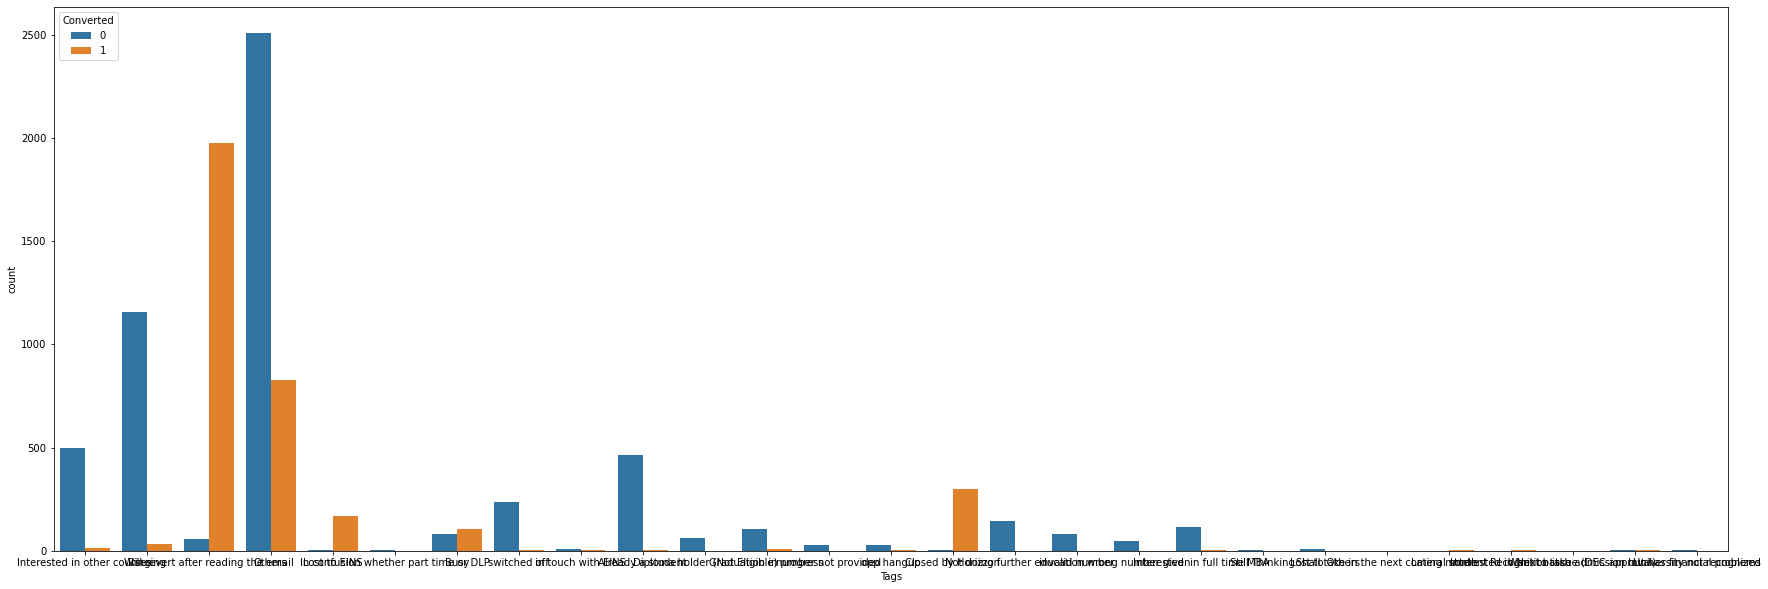

Update me on Supply Chain Content


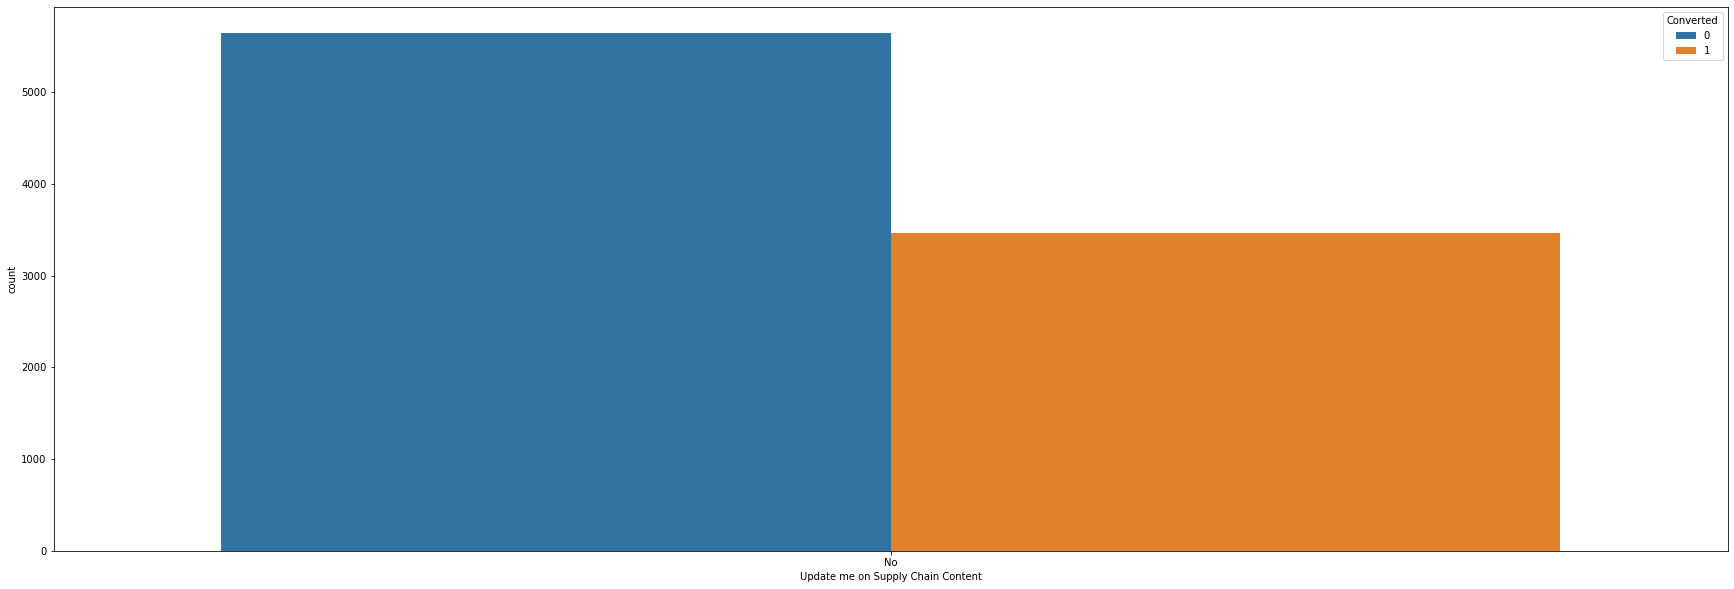

Get updates on DM Content


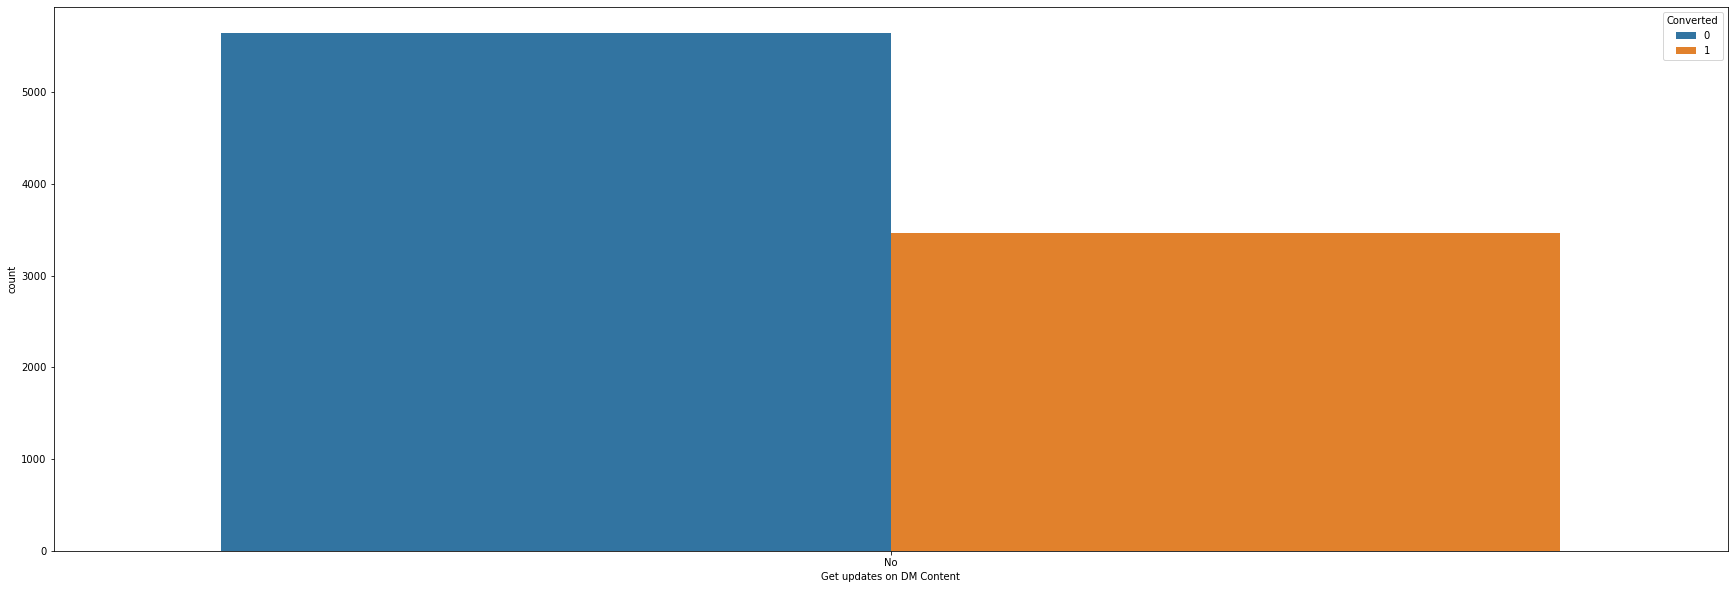

City


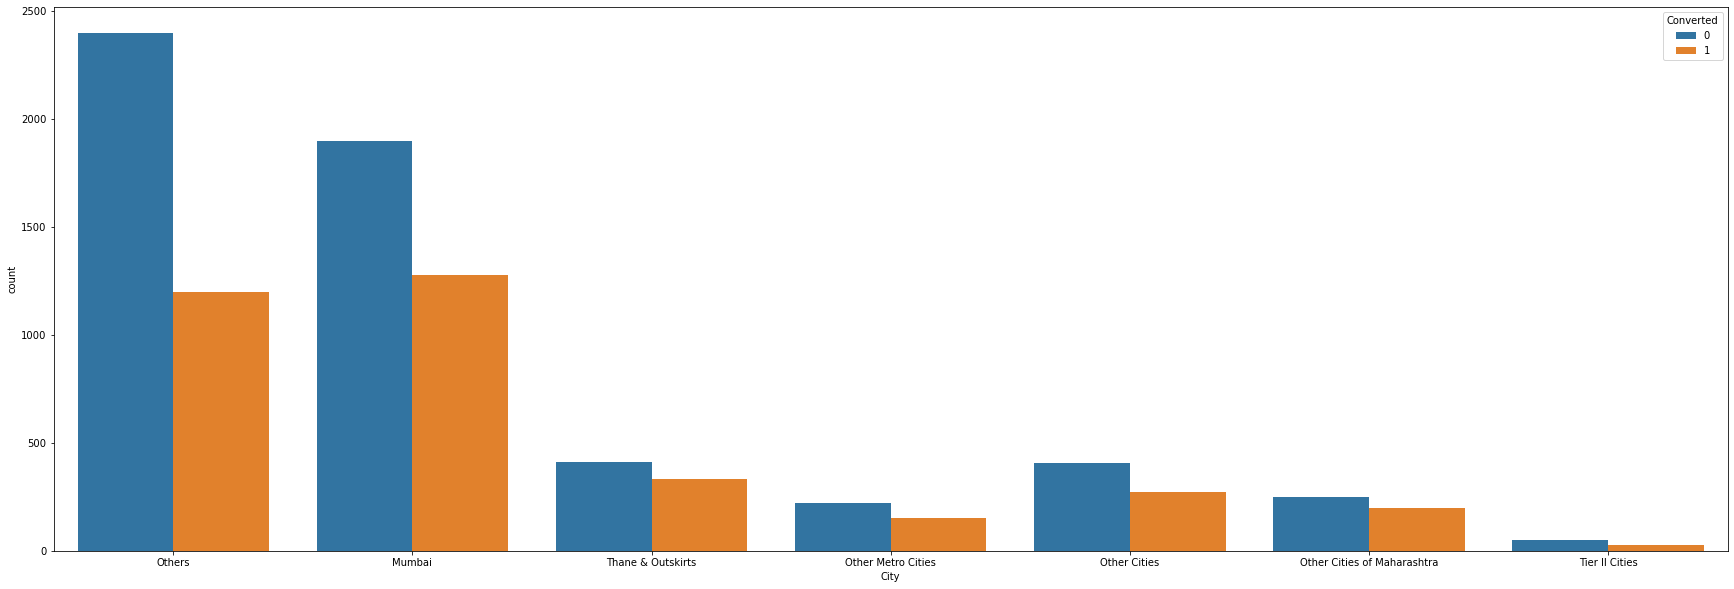

I agree to pay the amount through cheque


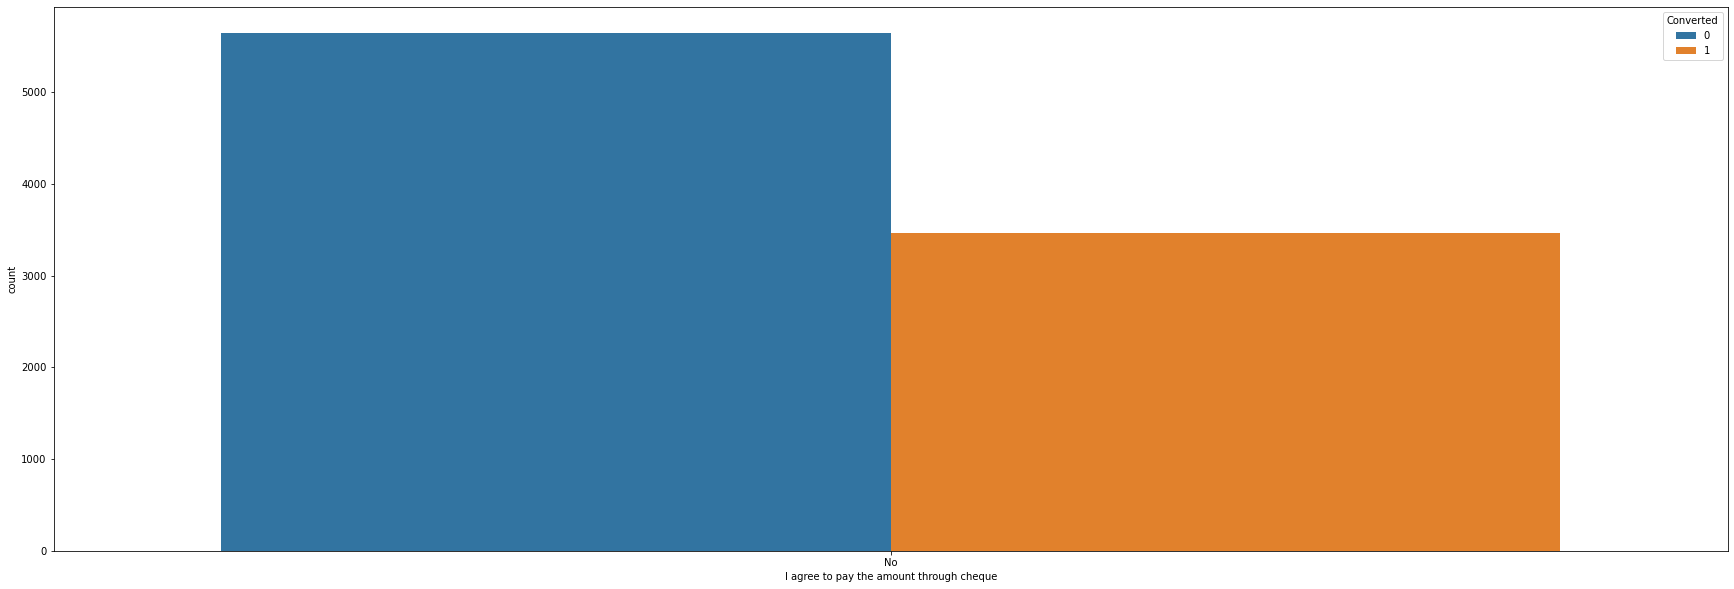

A free copy of Mastering The Interview


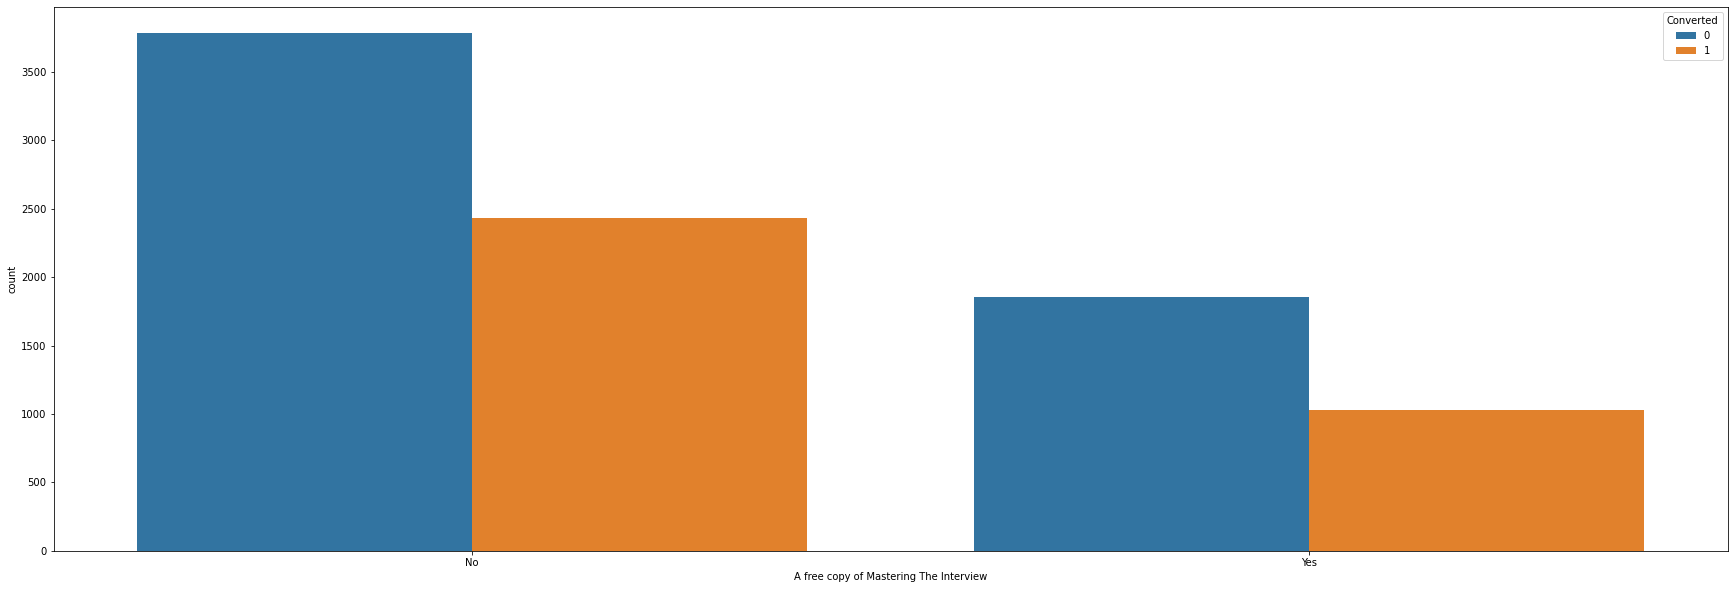

Last Notable Activity


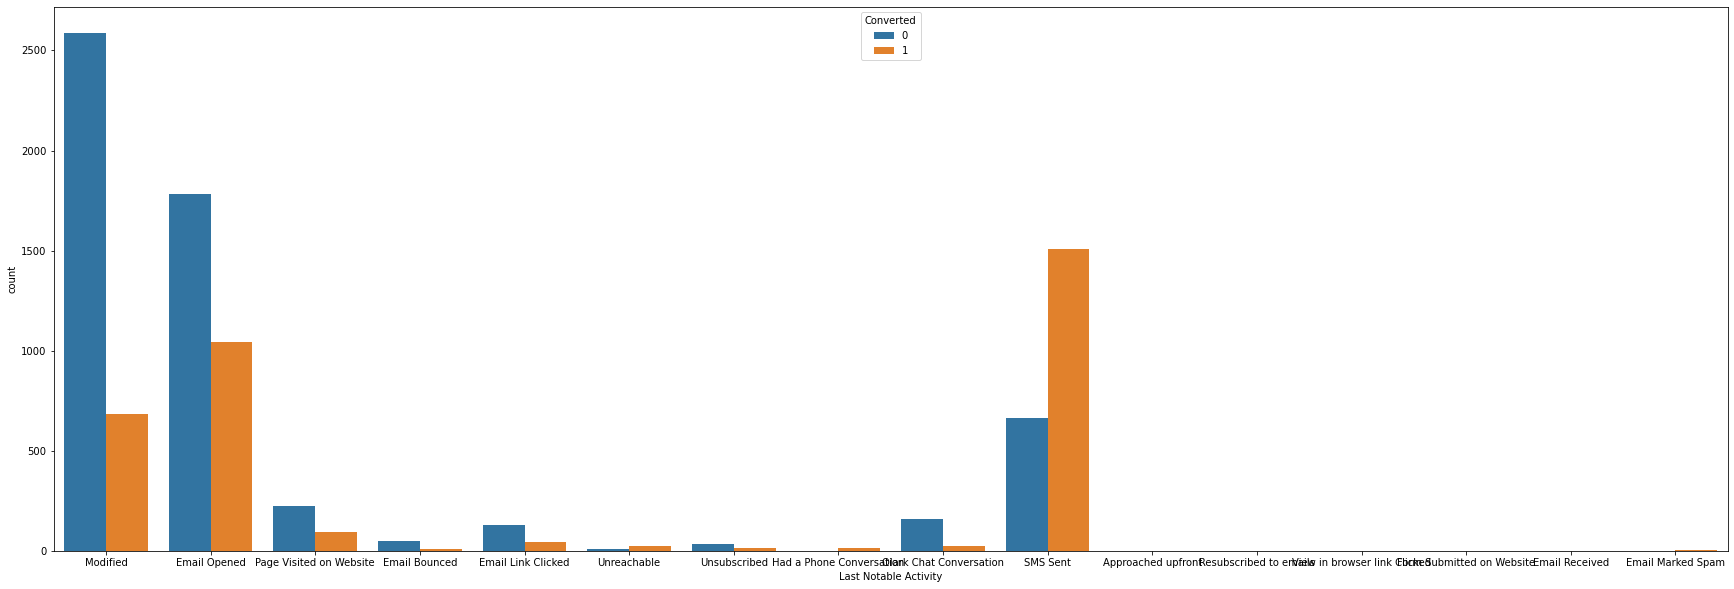

In [153]:
for i in cat:
    print(i)
    plt.figure(figsize=[30,10])
    sns.countplot(x=i, hue="Converted", data=leads)
    plt.show()

#### Insights:

- 1. Leads with Do not call and do not Email are not likely to take up the course
- 2. Last Activity with Email Opened and SMS Sent are more likely to take up the course
- 3. Majority of the leads are from India
- 4. Most people with other or unknown specialization more likely to take up the course followed by Finance Management and Resource marketing
- 5. Working professionals are more likely to take up the course

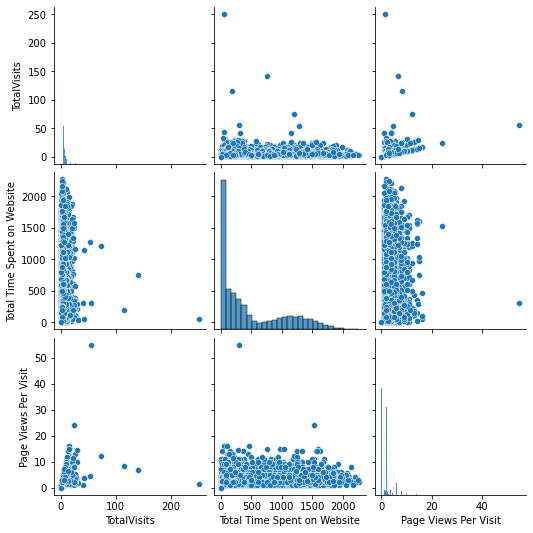

In [154]:
#Pair plot on Numerical values
num = ["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]
sns.pairplot(leads[num])
plt.show()

<AxesSubplot:>

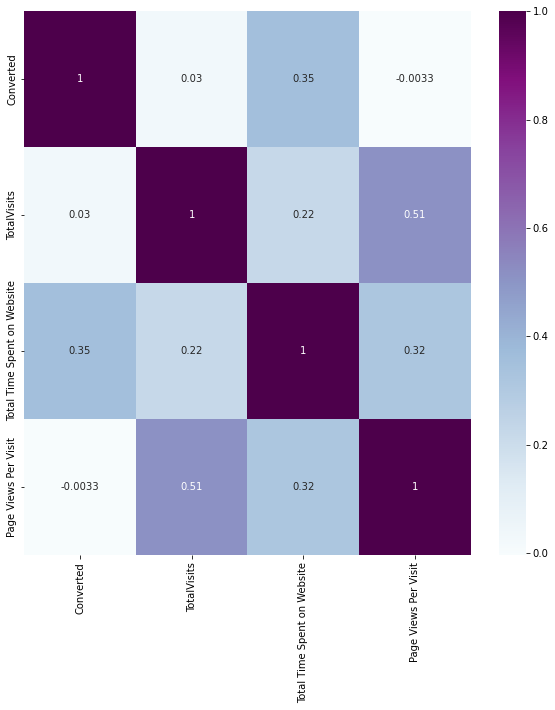

In [155]:
#Correlation in Numerical variables
plt.figure(figsize=[10,10])
sns.heatmap(leads.corr(),annot=True,cmap='BuPu')

#### Insights :

- 1. Total Visits and Page Views Per Visit are positively correlated with a value of 0.51
- 2. Total Time Spent on Website has positive correlation with Page Views Per Visit with a value of 0.32

#### Mapping the Binary Columns to 0 and 1

In [156]:
binary_cols = ["Do Not Email","Do Not Call","Through Recommendations","Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque","A free copy of Mastering The Interview","Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement"]
binary_cols
leads[binary_cols] = leads[binary_cols].apply(lambda x: x.map({"Yes":1,"No":0}))
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Others,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,0,0,Others,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,0,0,Others,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,Mumbai,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,0,0,Mumbai,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,Mumbai,0,0,Modified


### Step 5: Data Preparation

- 1. Create dummies for categorical variables
- 2. Perform Train Test Split
- 3. Perform Scaling

In [157]:
cat_cols = list(leads.select_dtypes(include='object'))
cat_cols

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'City',
 'Last Notable Activity']

In [158]:
a = pd.get_dummies(leads['Lead Origin'], prefix='Lead Origin',drop_first=True)
leads_final = pd.concat([leads,a], axis=1)

b = pd.get_dummies(leads['Lead Source'], prefix='Lead Source',drop_first=True)
leads_final1 = pd.concat([leads_final,b], axis=1)

c = pd.get_dummies(leads['Last Activity'], prefix='Last Activity',drop_first=True)
leads_final2 = pd.concat([leads_final1,c], axis=1)

d = pd.get_dummies(leads['Country'], prefix='Country',drop_first=True)
leads_final3 = pd.concat([leads_final2,d], axis=1)

e = pd.get_dummies(leads['Specialization'], prefix='Specialization',drop_first=True)
leads_final4 = pd.concat([leads_final3,e], axis=1)

f = pd.get_dummies(leads['What is your current occupation'], prefix='What is your current occupation',drop_first=True)
leads_final5 = pd.concat([leads_final4,f], axis=1)

g = pd.get_dummies(leads['What matters most to you in choosing a course'], prefix='What matters most to you in choosing a course',drop_first=True)
leads_final6 = pd.concat([leads_final5,g], axis=1)

h = pd.get_dummies(leads['Tags'], prefix='Tags',drop_first=True)
leads_final7 = pd.concat([leads_final6,h], axis=1)

i = pd.get_dummies(leads['City'], prefix='City',drop_first=True)
leads_final8 = pd.concat([leads_final7,i], axis=1)

j = pd.get_dummies(leads['Last Notable Activity'], prefix='Last Notable Activity',drop_first=True)
leads_finals = pd.concat([leads_final8,j], axis=1)

In [159]:
leads_finals.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Others,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_Others,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Others,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags

In [160]:
leads_finals[cat_cols].head()

,Lead Origin,Lead Source,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,City,Last Notable Activity
0,API,Olark Chat,Page Visited on Website,Others,Others,Unemployed,Better Career Prospects,Interested in other courses,Others,Modified
1,API,Organic Search,Email Opened,India,Others,Unemployed,Better Career Prospects,Ringing,Others,Email Opened
2,Landing Page Submission,Direct Traffic,Email Opened,India,Business Administration,Student,Better Career Prospects,Will revert after reading the email,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,Ringing,Mumbai,Modified
4,Landing Page Submission,Google,Converted to Lead,India,Others,Unemployed,Better Career Prospects,Will revert after reading the email,Mumbai,Modified


In [161]:
# Drop the Redundent Categorical columns
leads_finals.drop(columns=cat_cols,axis=1,inplace=True)

In [162]:
leads_finals.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 170 columns):
 #    Column                                                                   Dtype  
---   ------                                                                   -----  
 0    Do Not Email                                                             int64  
 1    Do Not Call                                                              int64  
 2    Converted                                                                int64  
 3    TotalVisits                                                              float64
 4    Total Time Spent on Website                                              int64  
 5    Page Views Per Visit                                                     float64
 6    Search                                                                   int64  
 7    Magazine                                                                 int64  
 8    Newspaper Articl

In [163]:
leads_finals.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Others,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_Others,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Others,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Others,City_

In [164]:
# Target and Feature variables split
X = leads_finals.drop("Converted",axis=1)
y = leads_finals["Converted"]

In [165]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Scale the data

In [166]:
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Others,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_Others,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Others,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Others,City_Thane & Ou

In [167]:
#Check the Imbalance in the Target variable
converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
converted

38.02043282434362

In [168]:
#plt.figure(figsize = (30,20))
#sns.heatmap(leads_finals.corr())
#plt.show()

### Step 6: Model Building

In [169]:
# Top 15 Feature Selection Using RFE
logregg = LogisticRegression() # Create logisitc Regression object
rfe = RFE(logregg, 15) # define the number of features
rfe.fit(X_train, y_train) # fit the data

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [170]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True, False, False,
       False, False,

In [171]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 2),
 ('Do Not Call', False, 101),
 ('TotalVisits', False, 79),
 ('Total Time Spent on Website', False, 6),
 ('Page Views Per Visit', False, 113),
 ('Search', False, 35),
 ('Magazine', False, 146),
 ('Newspaper Article', False, 100),
 ('X Education Forums', False, 99),
 ('Newspaper', False, 106),
 ('Digital Advertisement', False, 63),
 ('Through Recommendations', False, 112),
 ('Receive More Updates About Our Courses', False, 152),
 ('Update me on Supply Chain Content', False, 147),
 ('Get updates on DM Content', False, 148),
 ('I agree to pay the amount through cheque', False, 154),
 ('A free copy of Mastering The Interview', False, 133),
 ('Lead Origin_Landing Page Submission', False, 45),
 ('Lead Origin_Lead Add Form', False, 7),
 ('Lead Origin_Lead Import', False, 80),
 ('Lead Source_Click2call', False, 137),
 ('Lead Source_Direct Traffic', False, 71),
 ('Lead Source_Facebook', False, 36),
 ('Lead Source_Google', False, 83),
 ('Lead Source_Live Chat', False,

In [172]:
col = X_train.columns[rfe.support_]
col

Index(['Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'What matters most to you in choosing a course_Others', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in Next batch',
       'Tags_Lateral student', 'Tags_Lost to EINS', 'Tags_Others',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_invalid number', 'Tags_switched off', 'Tags_wrong number given',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [173]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       ...
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=154)

### Model 1

#### Assessing the model with StatsModels

In [174]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1240.7
Date:                Tue, 09 Aug 2022   Deviance:                       2481.3
Time:                        08:55:15   Pearson chi2:                 9.03e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.6703      0.197    -18.623      0.000      -4.057      -3.284
Lead Source_Welingak Website                             2.4220      0.735      3.296      0.001       0.982       3.862
Last Activity_Olark Chat Conversation                   -1.4466      0.221     -6.542      0.000      -1.880      -1.013
What matters most to you in choosing a course_Others    -2.7626      0.144    -19.140      0.000      -3.046      -2.480
Tags_Busy                                                2.6539      0.294      9.016      0.000       2.077       3.231
Tags_Closed by Horizzon                                  8.4339      0.738     11.422      0.000       6.987       9.881
Tags_Interested in Next batch                           24.7920   3.97e+04      0.001      1.000   -7.78e+04    7.79e+04
Tags_Lateral student                                    26.7626   4.34e+04      0.001      1.000    -8.5e+04    8.51e+04
Tags_Lost to EINS                                        9.6914      0.763     12.707      0.000       8.197      11.186
Tags_Others                                              4.0458      0.228     17.769      0.000       3.600       4.492
Tags_Ringing                                            -1.3700      0.307     -4.459      0.000      -1.972      -0.768
Tags_Will revert after reading the email                 6.6669      0.254     26.241      0.000       6.169       7.165
Tags_invalid number                                     -1.8080      1.042     -1.735      0.083      -3.850       0.234
Tags_switched off                                       -1.8676      0.627     -2.978      0.003      -3.097      -0.638
Tags_wrong number given                                -21.3642   1.27e+04     -0.002      0.999   -2.49e+04    2.49e+04
Last Notable Activity_SMS Sent                           2.4444      0.134     18.237      0.000       2.182       2.707
========================================================================================================================
"""

In [175]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.226898
5520    0.265725
1962    0.003919
1566    0.952420
9170    0.024837
5097    0.084161
8954    0.069404
309     0.952420
5519    0.514310
1050    0.952420
dtype: float64

In [176]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.22689775, 0.26572519, 0.0039194 , 0.95242009, 0.02483688,
       0.08416096, 0.06940365, 0.95242009, 0.51430953, 0.95242009])

#### Creating a dataframe with the actual converted flag and the predicted probabilities

In [177]:
y_train_pred_final = pd.DataFrame({'Converted_val':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final.head()

,Converted_val,Converted_Prob
0,0,0.226898
1,0,0.265725
2,0,0.003919
3,1,0.952420
4,0,0.024837


#### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [178]:
y_train_pred_final['predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted_val,Converted_Prob,predicted
0,0,0.226898,0
1,0,0.265725,0
2,0,0.003919,0
3,1,0.952420,1
4,0,0.024837,0


In [179]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final["Converted_val"], y_train_pred_final["predicted"])
print(confusion)

[[3691  262]
 [ 190 2229]]


In [180]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted_val"], y_train_pred_final["predicted"]))

0.9290646578782172


### Checking VIFs

In [181]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Source_Welingak Website,1.13
3,Tags_Busy,1.04
7,Tags_Lost to EINS,1.04
12,Tags_switched off,1.02
4,Tags_Closed by Horizzon,1.01
11,Tags_invalid number,1.01
13,Tags_wrong number given,1.01
5,Tags_Interested in Next batch,1.00
6,Tags_Lateral student,1.00
1,Last Activity_Olark Chat Conversation,0.30


In [182]:
# Dropping the column "Tags_Interested in Next batch" as it has high P-value
col = col.drop('Tags_Interested in Next batch', 1)
col

Index(['Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'What matters most to you in choosing a course_Others', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lateral student', 'Tags_Lost to EINS',
       'Tags_Others', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

### Model 2

In [183]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1246.4
Date:                Tue, 09 Aug 2022   Deviance:                       2492.7
Time:                        08:55:18   Pearson chi2:                 9.15e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.5689      0.186    -19.166      0.000      -3.934      -3.204
Lead Source_Welingak Website                             2.4213      0.735      3.294      0.001       0.981       3.862
Last Activity_Olark Chat Conversation                   -1.4442      0.221     -6.535      0.000      -1.877      -1.011
What matters most to you in choosing a course_Others    -2.7726      0.145    -19.144      0.000      -3.056      -2.489
Tags_Busy                                                2.5309      0.288      8.800      0.000       1.967       3.095
Tags_Closed by Horizzon                                  8.3323      0.736     11.328      0.000       6.891       9.774
Tags_Lateral student                                    26.6566   4.33e+04      0.001      1.000   -8.49e+04     8.5e+04
Tags_Lost to EINS                                        9.5984      0.760     12.627      0.000       8.109      11.088
Tags_Others                                              3.9395      0.218     18.047      0.000       3.512       4.367
Tags_Ringing                                            -1.5085      0.300     -5.033      0.000      -2.096      -0.921
Tags_Will revert after reading the email                 6.5620      0.246     26.713      0.000       6.081       7.043
Tags_invalid number                                     -1.9459      1.040     -1.871      0.061      -3.985       0.093
Tags_switched off                                       -2.0074      0.624     -3.219      0.001      -3.230      -0.785
Tags_wrong number given                                -21.5000   1.27e+04     -0.002      0.999   -2.49e+04    2.48e+04
Last Notable Activity_SMS Sent                           2.4888      0.134     18.597      0.000       2.226       2.751
========================================================================================================================
"""

In [184]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Source_Welingak Website,1.13
3,Tags_Busy,1.04
6,Tags_Lost to EINS,1.04
11,Tags_switched off,1.02
4,Tags_Closed by Horizzon,1.01
10,Tags_invalid number,1.01
12,Tags_wrong number given,1.01
5,Tags_Lateral student,1.00
1,Last Activity_Olark Chat Conversation,0.30
13,Last Notable Activity_SMS Sent,0.27


In [185]:
# Dropping the column "Tags_Lateral student" as it has high P-value
col = col.drop('Tags_Lateral student', 1)
col

Index(['Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'What matters most to you in choosing a course_Others', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Others',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_invalid number', 'Tags_switched off', 'Tags_wrong number given',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

### Model 3

In [186]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1254.8
Date:                Tue, 09 Aug 2022   Deviance:                       2509.6
Time:                        08:55:20   Pearson chi2:                 9.17e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4823      0.179    -19.474      0.000      -3.833      -3.132
Lead Source_Welingak Website                             2.4206      0.735      3.293      0.001       0.980       3.861
Last Activity_Olark Chat Conversation                   -1.4489      0.221     -6.565      0.000      -1.881      -1.016
What matters most to you in choosing a course_Others    -2.7739      0.145    -19.147      0.000      -3.058      -2.490
Tags_Busy                                                2.4423      0.283      8.631      0.000       1.888       2.997
Tags_Closed by Horizzon                                  8.2462      0.734     11.239      0.000       6.808       9.684
Tags_Lost to EINS                                        9.5136      0.758     12.544      0.000       8.027      11.000
Tags_Others                                              3.8530      0.212     18.170      0.000       3.437       4.269
Tags_Ringing                                            -1.5984      0.295     -5.415      0.000      -2.177      -1.020
Tags_Will revert after reading the email                 6.4756      0.240     26.968      0.000       6.005       6.946
Tags_invalid number                                     -2.0358      1.039     -1.960      0.050      -4.072       0.000
Tags_switched off                                       -2.0975      0.621     -3.375      0.001      -3.315      -0.880
Tags_wrong number given                                -21.5894   1.27e+04     -0.002      0.999   -2.49e+04    2.48e+04
Last Notable Activity_SMS Sent                           2.4927      0.133     18.676      0.000       2.231       2.754
========================================================================================================================
"""

In [187]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Source_Welingak Website,1.13
3,Tags_Busy,1.04
5,Tags_Lost to EINS,1.04
10,Tags_switched off,1.02
4,Tags_Closed by Horizzon,1.01
9,Tags_invalid number,1.01
11,Tags_wrong number given,1.01
1,Last Activity_Olark Chat Conversation,0.30
12,Last Notable Activity_SMS Sent,0.27
2,What matters most to you in choosing a course_...,0.20


In [188]:
# Dropping the column "Tags_wrong number given" as it has high P-value
col = col.drop('Tags_wrong number given', 1)
col

Index(['Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'What matters most to you in choosing a course_Others', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Others',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_invalid number', 'Tags_switched off',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

### Model 4

In [189]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1259.2
Date:                Tue, 09 Aug 2022   Deviance:                       2518.5
Time:                        08:55:23   Pearson chi2:                 9.08e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.5947      0.180    -19.916      0.000      -3.948      -3.241
Lead Source_Welingak Website                             2.4214      0.735      3.295      0.001       0.981       3.862
Last Activity_Olark Chat Conversation                   -1.4499      0.221     -6.564      0.000      -1.883      -1.017
What matters most to you in choosing a course_Others    -2.7641      0.144    -19.156      0.000      -3.047      -2.481
Tags_Busy                                                2.5757      0.281      9.160      0.000       2.025       3.127
Tags_Closed by Horizzon                                  8.3588      0.734     11.386      0.000       6.920       9.798
Tags_Lost to EINS                                        9.6176      0.759     12.673      0.000       8.130      11.105
Tags_Others                                              3.9701      0.213     18.651      0.000       3.553       4.387
Tags_Ringing                                            -1.4500      0.293     -4.956      0.000      -2.023      -0.877
Tags_Will revert after reading the email                 6.5913      0.241     27.347      0.000       6.119       7.064
Tags_invalid number                                     -1.8879      1.038     -1.819      0.069      -3.922       0.146
Tags_switched off                                       -1.9478      0.620     -3.141      0.002      -3.163      -0.733
Last Notable Activity_SMS Sent                           2.4497      0.132     18.628      0.000       2.192       2.707
========================================================================================================================
"""

In [190]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Source_Welingak Website,1.13
3,Tags_Busy,1.04
5,Tags_Lost to EINS,1.04
10,Tags_switched off,1.02
4,Tags_Closed by Horizzon,1.01
9,Tags_invalid number,1.01
1,Last Activity_Olark Chat Conversation,0.30
11,Last Notable Activity_SMS Sent,0.27
2,What matters most to you in choosing a course_...,0.20
8,Tags_Will revert after reading the email,0.11


In [191]:
# Dropping the column "Tags_invalid number" as it has high P-value
col = col.drop('Tags_invalid number', 1)
col

Index(['Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'What matters most to you in choosing a course_Others', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Others',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_switched off', 'Last Notable Activity_SMS Sent'],
      dtype='object')

### Model 5

In [192]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6360
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1262.1
Date:                Tue, 09 Aug 2022   Deviance:                       2524.2
Time:                        08:55:26   Pearson chi2:                 9.03e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.7132      0.180    -20.628      0.000      -4.066      -3.360
Lead Source_Welingak Website                             2.4222      0.735      3.297      0.001       0.982       3.862
Last Activity_Olark Chat Conversation                   -1.4506      0.221     -6.563      0.000      -1.884      -1.017
What matters most to you in choosing a course_Others    -2.7562      0.144    -19.163      0.000      -3.038      -2.474
Tags_Busy                                                2.7114      0.278      9.748      0.000       2.166       3.257
Tags_Closed by Horizzon                                  8.4774      0.734     11.550      0.000       7.039       9.916
Tags_Lost to EINS                                        9.7293      0.759     12.820      0.000       8.242      11.217
Tags_Others                                              4.0924      0.212     19.322      0.000       3.677       4.508
Tags_Ringing                                            -1.3020      0.289     -4.511      0.000      -1.868      -0.736
Tags_Will revert after reading the email                 6.7125      0.240     27.936      0.000       6.242       7.183
Tags_switched off                                       -1.7988      0.618     -2.910      0.004      -3.010      -0.587
Last Notable Activity_SMS Sent                           2.4143      0.130     18.588      0.000       2.160       2.669
========================================================================================================================
"""

In [193]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Source_Welingak Website,1.13
3,Tags_Busy,1.04
5,Tags_Lost to EINS,1.04
9,Tags_switched off,1.02
4,Tags_Closed by Horizzon,1.01
1,Last Activity_Olark Chat Conversation,0.30
10,Last Notable Activity_SMS Sent,0.27
2,What matters most to you in choosing a course_...,0.20
8,Tags_Will revert after reading the email,0.11
7,Tags_Ringing,0.07


#### We can consider Model 5 as the final model as P-value for all the features are less than 0.05 and VIF's are less than 5

In [194]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.214347
5520    0.268602
1962    0.004022
1566    0.952545
9170    0.023819
5097    0.084946
8954    0.069077
309     0.952545
5519    0.509322
1050    0.952545
dtype: float64

In [195]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.21434712, 0.26860183, 0.00402195, 0.95254533, 0.02381874,
       0.08494608, 0.06907686, 0.95254533, 0.50932174, 0.95254533])

In [196]:
y_train_pred_final = pd.DataFrame({'Converted_val':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final.head()

,Converted_val,Converted_Prob
0,0,0.214347
1,0,0.268602
2,0,0.004022
3,1,0.952545
4,0,0.023819


In [197]:
y_train_pred_final['predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted_val,Converted_Prob,predicted
0,0,0.214347,0
1,0,0.268602,0
2,0,0.004022,0
3,1,0.952545,1
4,0,0.023819,0


### Step 7: Model Evaluation

In [198]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final["Converted_val"], y_train_pred_final["predicted"])
print(confusion)

[[3691  262]
 [ 197 2222]]


In [199]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted_val"], y_train_pred_final["predicted"]))

0.9279661016949152


In [200]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [201]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9185613890037205

In [202]:
# Let us calculate specificity
TN / float(TN+FP)

0.9337212243865418

In [203]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.06627877561345813


In [204]:
# positive predictive value 
print (TP / float(TP+FP))

0.894524959742351


In [205]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9493312757201646


### Plotting the ROC Curve

In [206]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [207]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final["Converted_val"], y_train_pred_final["Converted_Prob"], drop_intermediate = False )

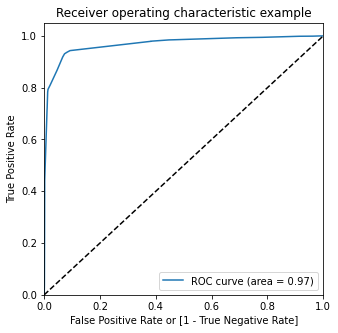

In [208]:
draw_roc(y_train_pred_final["Converted_val"], y_train_pred_final["Converted_Prob"])

### Finding Optimal Cutoff Point
##### Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [209]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted_val,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.214347,0,1,1,1,0,0,0,0,0,0,0
1,0,0.268602,0,1,1,1,0,0,0,0,0,0,0
2,0,0.004022,0,1,0,0,0,0,0,0,0,0,0
3,1,0.952545,1,1,1,1,1,1,1,1,1,1,1
4,0,0.023819,0,1,0,0,0,0,0,0,0,0,0


In [210]:
#Calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted_val"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.921061  0.943365  0.907412
0.2   0.2  0.921061  0.943365  0.907412
0.3   0.3  0.927966  0.918561  0.933721
0.4   0.4  0.927966  0.918561  0.933721
0.5   0.5  0.927966  0.918561  0.933721
0.6   0.6  0.914626  0.809425  0.979003
0.7   0.7  0.914626  0.809425  0.979003
0.8   0.8  0.914626  0.809425  0.979003
0.9   0.9  0.909605  0.782141  0.987604


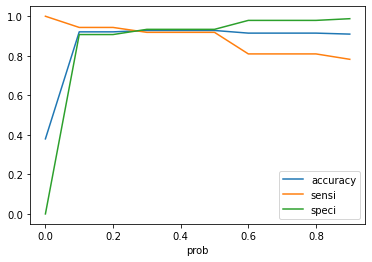

In [211]:
#Plot of accuracy,sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [212]:
y_train_pred_final['final_predicted'] = y_train_pred_final["Converted_Prob"].map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted_val,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.214347,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.268602,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.004022,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.952545,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.023819,0,1,0,0,0,0,0,0,0,0,0,0


In [213]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final["Converted_val"], y_train_pred_final.final_predicted)

0.9279661016949152

In [214]:
confusion2 = metrics.confusion_matrix(y_train_pred_final["Converted_val"], y_train_pred_final.final_predicted )
confusion2

array([[3691,  262],
       [ 197, 2222]], dtype=int64)

In [215]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [216]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9185613890037205

In [217]:
# Let us calculate specificity
TN / float(TN+FP)

0.9337212243865418

In [218]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.06627877561345813


In [219]:
# Positive predictive value 
print (TP / float(TP+FP))

0.894524959742351


In [220]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9493312757201646


### Precision and Recall


In [221]:
confusion = metrics.confusion_matrix(y_train_pred_final["Converted_val"], y_train_pred_final.predicted )
confusion

array([[3691,  262],
       [ 197, 2222]], dtype=int64)

#### Precision
TP / TP + FP

In [222]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.894524959742351

#### Recall
TP / TP + FN

In [223]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9185613890037205

### Precision and recall tradeoff

In [224]:
y_train_pred_final["Converted_val"], y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: Converted_val, Length: 6372, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: predicted, Length: 6372, dtype: int64)

In [225]:
p, r, thresholds = precision_recall_curve(y_train_pred_final["Converted_val"], y_train_pred_final["Converted_Prob"])

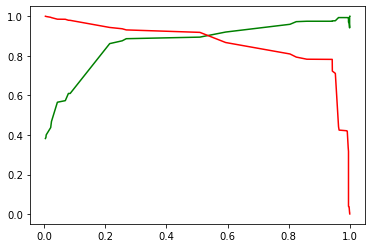

In [226]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 8: Making predictions on the test set

In [227]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [228]:
X_test = X_test[col]
X_test.head()

,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,What matters most to you in choosing a course_Others,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_SMS Sent
3504,0,0,0,0,0,0,0,1,0,0,0
4050,0,0,0,0,0,0,0,0,1,0,1
7201,0,0,0,0,0,0,0,0,0,0,1
1196,0,0,0,0,0,0,0,1,0,0,0
8219,0,0,0,0,0,1,0,0,0,0,0


In [229]:
X_test_sm = sm.add_constant(X_test)

In [230]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3504    0.006592
4050    0.995564
7201    0.214347
1196    0.006592
8219    0.997567
8747    0.084946
9048    0.084946
6524    0.023819
7693    0.214347
8187    0.069077
dtype: float64

In [231]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3504,0.006592
4050,0.995564
7201,0.214347
1196,0.006592
8219,0.997567


In [232]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [233]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [234]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,0
0,0,0.006592
1,1,0.995564
2,0,0.214347
3,0,0.006592
4,1,0.997567


In [235]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob','Converted':'Converted_val'})
y_pred_final.head()

,Converted_val,Converted_Prob
0,0,0.006592
1,1,0.995564
2,0,0.214347
3,0,0.006592
4,1,0.997567


In [236]:
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.42 else 0)

In [237]:
y_pred_final.head()

,Converted_val,Converted_Prob,final_predicted
0,0,0.006592,0
1,1,0.995564,1
2,0,0.214347,0
3,0,0.006592,0
4,1,0.997567,1


In [238]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final['Converted_val'], y_pred_final.final_predicted)

0.9256682533870377

In [239]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted_val'], y_pred_final.final_predicted )
confusion2

array([[1585,  104],
       [  99,  943]], dtype=int64)

In [240]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [241]:
# Let's see the sensitivity
TP / float(TP+FN)

0.9049904030710173

In [242]:
# Let us calculate specificity
TN / float(TN+FP)

0.9384251036116045